In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from tabulate import tabulate

# 数理统计基础
> 数据样本分析从分析数据样本分布开始

## 数据分布分析


### 样本



| Name     | Salary      |
|----------|-------------|
| Dan      | 50,000      |
| Joann    | 54,000      |
| Pedro    | 50,000      |
| Rosie    | 189,000     |
| Ethan    | 55,000      |
| Vicky    | 40,000      |
| Frederic | 59,000      |


#### 均值



\begin{equation}\bar{x} = \frac{\displaystyle\sum_{i=1}^{n}x_{i}}{n}\end{equation}


\begin{equation}\bar{x} = \frac{50000+54000+50000+189000+55000+40000+59000}{7} = 71000 \end{equation}

In [10]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

df['Salary'].mean()

71000.0

#### 中值

把数据进行排序

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

取中间的位置${\frac{n+1}{2} = 4}$

| Salary      |
|-------------|
| 40,000      |
| 50,000      |
| 50,000      |
|***>54,000*** |
| 55,000      |
| 59,000      |
| 189,000     |

如果是奇数个元素，则

\begin{equation}\frac{n}{2} \;\;\;\;and \;\;\;\; \frac{n}{2} + 1\end{equation}

In [9]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

df['Salary'].median()

54000.0

#### 众数

如果选出现频率最高的数字时


| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
| 55,000      |
| 59,000      |
| 189,000     |

应该是***50,000****

In [8]:

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

df['Salary'].mode()

0    50000
dtype: int64

##### 多个众数
很显然，众数可能有多个

| Salary      |
|-------------|
| 40,000      |
|***>50,000***|
|***>50,000***|
| 54,000      |
|***>59,000***|
|***>59,000***|
| 189,000     |

In [7]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,59000,40000,59000]})

df['Salary'].mode()

0    50000
1    59000
dtype: int64

### 分布密度

找到中心点之后，希望获得更多关于分布形状的信息。

先从最大值和最小值开始：

In [22]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})
s = df['Salary']
print(tabulate([['min','mode','media','mean','max'],
                [s.min(),s.mode()[0],s.median(),s.mean(),s.max()]]))

-----  -----  -------  -------  ------
min    mode   media    mean     max
40000  50000  54000.0  71000.0  189000
-----  -----  -------  -------  ------


##### 可视化


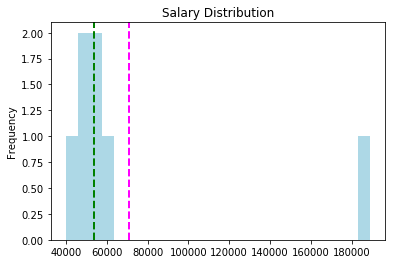

In [23]:
%matplotlib inline
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

salary = df['Salary']
salary.plot.hist(title='Salary Distribution', color='lightblue', bins=25)  
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

<span style="color:magenta">***均值***</span> 和 <span style="color:green">***中值***</span> 用绿色和紫色虚线标出:

- 直方图的高度是对应的样本数
- 可见，大部分样本在40000和55000之间
- 均值高于中值

直方图给出了分布密度的信息，在上图基础上绘制密度曲线：

> [高斯概率密度估计](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html?highlight=gaussian_kde#scipy.stats.gaussian_kde)文档

![gaussian_kde_snapshot](http://bazhou.blob.core.windows.net/learning/mpp/gaussian_kde.png)

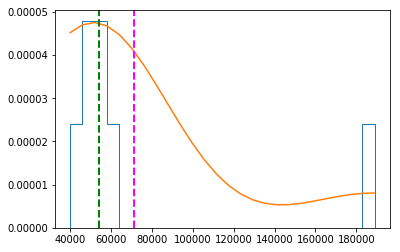

In [26]:
%matplotlib inline
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000]})

salary = df['Salary']
density = stats.gaussian_kde(salary)
n, x, _ = plt.hist(salary, histtype='step', density=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(salary.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(salary.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()


>概率密度曲线的形状并不对称

- 峰值在左边，右边有一个长尾
  因为右侧的值把均值给拉向右边，所以叫右偏态分布

- 再看一个左偏态分布的例子

| Name     | Hours |
|----------|-------|
| Dan      | 41    |
| Joann    | 40    |
| Pedro    | 36    |
| Rosie    | 30    |
| Ethan    | 35    |
| Vicky    | 39    |
| Frederic | 40    |

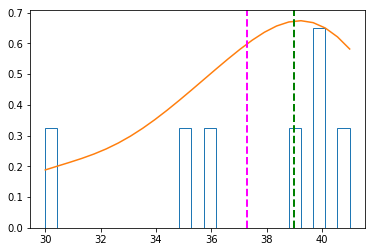

In [28]:
%matplotlib inline

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

- 下面是一个正态分布的例子

| Name     | Grade |
|----------|-------|
| Dan      | 50    |
| Joann    | 50    |
| Pedro    | 46    |
| Rosie    | 95    |
| Ethan    | 50    |
| Vicky    | 5     |
| Frederic | 57    |

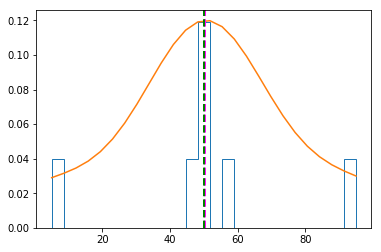

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Grade':[50,50,46,95,50,5,57]})

grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*7.5)
plt.axvline(grade.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(grade.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

一个对称的钟形曲线 The <span style="color:magenta">***均值***</span>, <span style="color:green">***中值***</span>, 和众值重合.

这就是最著名的正态分布（高斯分布）

#### Skewness and Kurtosis
You can measure *skewness* (in which direction the data is skewed and to what degree) and kurtosis (how "peaked" the data is) to get an idea of the shape of the data distribution. In Python, you can use the ***skew*** and ***kurt*** functions to find this:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', normed=True, bins=25)  
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

Now let's look at the distribution of a real dataset - let's see how the heights of the father's measured in Galton's study of parent and child heights are distributed:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm

df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data


fathers = df['father']
density = stats.gaussian_kde(fathers)
n, x, _ = plt.hist(fathers, histtype='step', normed=True, bins=50)  
plt.plot(x, density(x)*2.5)
plt.axvline(fathers.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(fathers.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()


As you can see, the father's height measurements are approximately normally distributed - in other words, they form a more or less *normal* distribution that is symmetric around the mean.

### Measures of Variance
We can see from the distribution plots of our data that the values in our dataset can vary quite widely. We can use various measures to quantify this variance.

#### Range
A simple way to quantify the variance in a dataset is to identify the difference between the lowest and highest values. This is called the *range*, and is calculated by subtracting the minimim value from the maximum value.

The following Python code creates a single Pandas dataframe for our school graduate data, and calculates the *range* for each of the numeric features:

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

numcols = ['Salary', 'Hours', 'Grade']
for col in numcols:
    print(df[col].name + ' range: ' + str(df[col].max() - df[col].min()))

#### Percentiles and Quartiles
The range is easy to calculate, but it's not a particularly useful statistic. For example, a range of 149,000 between the lowest and highest salary does not tell us which value within that range a graduate is most likely to earn -  it doesn't tell us nothing about how the salaries are distributed around the mean within that range.  The range tells us very little about the comparative position of an individual value within the distribution - for example, Frederic scored 57 in his final grade at school; which is a pretty good score (it's more than all but one of his classmates); but this isn't immediately apparent from a score of 57 and range of 90.

##### Percentiles
A percentile tells us where a given value is ranked in the overall distribution. For example, 25% of the data in a distribution has a value lower than the 25th percentile; 75% of the data has a value lower than the 75th percentile, and so on. Note that half of the data has a value lower than the 50th percentile - so the 50th percentile is also the median!

Let's examine Frederic's grade using this approach. We know he scored 57, but how does he rank compared to his fellow students?

Well, there are seven students in total, and five of them scored less than Frederic; so we can calculate the percentile for Frederic's grade like this:

\begin{equation}\frac{5}{7} \times 100 \approx 71.4\end{equation} 

So Frederic's score puts him at the 71.4th percentile in his class.

In Python, you can use the ***percentileofscore*** function in the *scipy.stats* package to calculate the percentile for a given value in a set of values:

In [ ]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(stats.percentileofscore(df['Grade'], 57, 'strict'))

We've used the strict definition of percentile; but sometimes it's calculated as being the percentage of values that are less than *or equal to* the value you're comparing. In this case, the calculation for Frederic's percentile would include his own score:

\begin{equation}\frac{6}{7} \times 100 \approx 85.7\end{equation} 

You can calculate this way in Python by using the ***weak*** mode of the ***percentileofscore*** function:

In [ ]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(stats.percentileofscore(df['Grade'], 57, 'weak'))

We've considered the percentile of Frederic's grade, and used it to rank him compared to his fellow students. So what about Dan, Joann, and Ethan? How do they compare to the rest of the class? They scored the same grade (50), so in a sense they share a percentile.

To deal with this *grouped* scenario, we can average the percentage rankings for the matching scores. We treat half of the scores matching the one we're ranking as if they are below it, and half as if they are above it. In this case, there were three matching scores of 50, and for each of these we calculate the percentile as if 1 was below and 1 was above. So the calculation for a percentile for Joann based on scores being less than or equal to 50 is:

\begin{equation}(\frac{4}{7}) \times 100 \approx 57.14\end{equation} 

The value of **4** consists of the two scores that are below Joann's score of 50, Joann's own score, and half of the scores that are the same as Joann's (of which there are two, so we count one).

In Python, the ***percentileofscore*** function has a ***rank*** function that calculates grouped percentiles like this:

In [ ]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(stats.percentileofscore(df['Grade'], 50, 'rank'))

##### Quartiles
Rather than using individual percentiles to compare data, we can consider the overall spread of the data by dividing those percentiles into four *quartiles*. The first quartile contains the values from the minimum to the 25th percentile, the second from the 25th percentile to the 50th percentile (which is the median), the third from the 50th percentile to the 75th percentile, and the fourth from the 75th percentile to the maximum.

In Python, you can use the ***quantile*** function of the *pandas.dataframe* class to find the threshold values at the 25th, 50th, and 75th percentiles (*quantile* is a generic term for a ranked position, such as a percentile or quartile).

Run the following code to find the quartile thresholds for the weekly hours worked by our former students:

In [ ]:
# Quartiles
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})
print(df['Hours'].quantile([0.25, 0.5, 0.75]))

Its usually easier to understand how data is distributed across the quartiles by visualizing it. You can use a histogram, but many data scientists use a kind of visualization called a *box plot* (or a *box and whiskers* plot).

Let's create a box plot for the weekly hours:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Plot a box-whisker chart
df['Hours'].plot(kind='box', title='Weekly Hours Distribution', figsize=(10,8))
plt.show()

The box plot consists of:
- A rectangular *box* that shows where the data between the 25th and 75th percentile (the second and third quartile) lie. This part of the distribution is often referred to as the *interquartile range* - it contains the middle 50 data values.
- *Whiskers* that extend from the box to the bottom of the first quartile and the top of the fourth quartile to show the full range of the data.
- A line in the box that shows that location of the median (the 50th percentile, which is also the threshold between the second and third quartile)

In this case, you can see that the interquartile range is between 35 and 40, with the median nearer the top of that range. The range of the first quartile is from around 30 to 35, and the fourth quartile is from 40 to 41.

#### Outliers
Let's take a look at another box plot - this time showing the distribution of the salaries earned by our former classmates:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,30,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Plot a box-whisker chart
df['Salary'].plot(kind='box', title='Salary Distribution', figsize=(10,8))
plt.show()

So what's going on here?

Well, as we've already noticed, Rosie earns significantly more than her former classmates. So much more in fact, that her salary has been identifed as an *outlier*. An outlier is a value that is so far from the center of the distribution compared to other values that it skews the distribution by affecting the mean. There are all sorts of reasons that you might have outliers in your data, including data entry errors, failures in sensors or data-generating equipment, or genuinely anomalous values.

So what should we do about it?

This really depends on the data, and what you're trying to use it for. In this case, let's assume we're trying to figure out what's a reasonable expectation of salary for a graduate of our school to earn. Ignoring for the moment that we have an extremly small dataset on which to base our judgement, it looks as if Rosie's salary could be either an error (maybe she mis-typed it in the form used to collect data) or a genuine anomaly (maybe she became a professional athelete or some other extremely highly paid job). Either way, it doesn't seem to represent a salary that a typical graduate might earn.

Let's see what the distribution of the data looks like without the outlier:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Plot a box-whisker chart
df['Salary'].plot(kind='box', title='Salary Distribution', figsize=(10,8), showfliers=False)
plt.show()

Now it looks like there's a more even distribution of salaries. It's still not quite symmetrical, but there's much less overall variance. There's potentially some cause here to disregard Rosie's salary data when we compare the salaries, as it is tending to skew the analysis.

So is that OK? Can we really just ignore a data value we don't like?

Again, it depends on what you're analyzing. Let's take a look at the distribution of final grades:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Plot a box-whisker chart
df['Grade'].plot(kind='box', title='Grade Distribution', figsize=(10,8))
plt.show()

Once again there are outliers, this time at both ends of the distribution. However, think about what this data represents. If we assume that the grade for the final test is based on a score out of 100, it seems reasonable to expect that some students will score very low (maybe even 0) and some will score very well (maybe even 100); but most will get a score somewhere in the middle.  The reason that the low and high scores here look like outliers might just be because we have so few data points. Let's see what happens if we include a few more students in our data:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Plot a box-whisker chart
df['Grade'].plot(kind='box', title='Grade Distribution', figsize=(10,8))
plt.show()

With more data, there are some more high and low scores; so we no longer consider the isolated cases to be outliers.

The key point to take away here is that you need to really understand the data and what you're trying to do with it, and you need to ensure that you have a reasonable sample size, before determining what to do with outlier values.

#### Variance and Standard Deviation
We've seen how to understand the *spread* of our data distribution using the range, percentiles, and quartiles; and we've seen the effect of outliers on the distribution. Now it's time to look at how to measure the amount of variance in the data.

##### Variance
Variance is measured as the average of the squared difference from the mean. For a full population, it's indicated by a squared Greek letter *sigma* (***&sigma;<sup>2</sup>***) and calculated like this:

\begin{equation}\sigma^{2} = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}\end{equation}

For a sample, it's indicated as ***s<sup>2</sup>*** calculated like this:

\begin{equation}s^{2} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}\end{equation}

In both cases, we sum the difference between the individual data values and the mean and square the result. Then, for a full population we just divide by the number of data items to get the average. When using a sample, we divide by the total number of items **minus 1** to correct for sample bias.

Let's work this out for our student grades (assuming our data is a sample from the larger student population).

First, we need to calculate the mean grade:

\begin{equation}\bar{x} = \frac{50+50+46+95+50+5+57}{7}\approx 50.43\end{equation}

Then we can plug that into our formula for the variance:

\begin{equation}s^{2} = \frac{(50-50.43)^{2}+(50-50.43)^{2}+(46-50.43)^{2}+(95-50.43)^{2}+(50-50.43)^{2}+(5-50.43)^{2}+(57-50.43)^{2}}{7-1}\end{equation}

So:

\begin{equation}s^{2} = \frac{0.185+0.185+19.625+1986.485+0.185+2063.885+43.165}{6}\end{equation}

Which simplifies to:

\begin{equation}s^{2} = \frac{4113.715}{6}\end{equation}

Giving the result:

\begin{equation}s^{2} \approx 685.619\end{equation}

The higher the variance, the more spread your data is around the mean.

In Python, you can use the ***var*** function of the *pandas.dataframe* class to calculate the variance of a column in a dataframe:

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(df['Grade'].var())

##### Standard Deviation
To calculate the variance, we squared the difference of each value from the mean. If we hadn't done this, the numerator of our fraction would always end up being zero (because the mean is at the center of our values). However, this means that the variance is not in the same unit of measurement as our data - in our case, since we're calculating the variance for grade points, it's in grade points squared; which is not very helpful.

To get the measure of variance back into the same unit of measurement, we need to find its square root:

\begin{equation}s = \sqrt{685.619} \approx 26.184\end{equation}

So what does this value represent?

It's the *standard deviation* for our grades data. More formally, it's calculated like this for a full population:

\begin{equation}\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}

Or like this for a sample:

\begin{equation}s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}}{n-1}}\end{equation}

Note that in both cases, it's just the square root of the corresponding variance forumla!

In Python, you can calculate it using the ***std*** function:

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

print(df['Grade'].std())

#### Standard Deviation in a Normal Distribution

In statistics and data science, we spend a lot of time considering *normal* distributions; because they occur so frequently. The standard deviation has an important relationship to play in a normal distribution.

Run the following cell to show a histogram of a *standard normal* distribution (which is a distribution with a mean of 0 and a standard deviation of 1):

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create a random standard normal distribution
df = pd.DataFrame(np.random.randn(100000, 1), columns=['Grade'])

# Plot the distribution as a histogram with a density curve
grade = df['Grade']
density = stats.gaussian_kde(grade)
n, x, _ = plt.hist(grade, color='lightgrey', normed=True, bins=100)  
plt.plot(x, density(x))

# Get the mean and standard deviation
s = df['Grade'].std()
m = df['Grade'].mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = [0.25, 0.25]
plt.plot(x1,y1, color='magenta')
plt.annotate('1s (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = [0.05, 0.05]
plt.plot(x2,y2, color='green')
plt.annotate('2s (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = [0.005, 0.005]
plt.plot(x3,y3, color='orange')
plt.annotate('3s (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(grade.mean(), color='grey', linestyle='dashed', linewidth=1)

plt.show()

The horizontal colored lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In any normal distribution:
- Approximately 68.26% of values fall within one standard deviation from the mean.
- Approximately 95.45% of values fall within two standard deviations from the mean.
- Approximately 99.73% of values fall within three standard deviations from the mean.

#### Z Score
So in a normal (or close to normal) distribution, standard deviation provides a way to evaluate how far from a mean a given range of values falls, allowing us to compare where a particular value lies within the distribution. For example, suppose Rosie tells you she was the highest scoring student among her friends - that doesn't really help us assess how well she scored. She may have scored only a fraction of a point above the second-highest scoring student. Even if we know she was in the top quartile; if we don't know how the rest of the grades are distributed it's still not clear how well she performed compared to her friends.

However, if she tells you how many standard deviations higher than the mean her score was, this will help you compare her score to that of her classmates.

So how do we know how many standard deviations above or below the mean a particular value is? We call this a *Z Score*, and it's calculated like this for a full population:

\begin{equation}Z = \frac{x - \mu}{\sigma}\end{equation}

or like this for a sample:

\begin{equation}Z = \frac{x - \bar{x}}{s}\end{equation}

So, let's examine Rosie's grade of 95. Now that we know the *mean* grade is 50.43 and the *standard deviation* is 26.184, we can calculate the Z Score for this grade like this:

\begin{equation}Z = \frac{95 - 50.43}{26.184} = 1.702\end{equation}.

So Rosie's grade is 1.702 standard deviations above the mean.

### Summarizing Data Distribution in Python
We've seen how to obtain individual statistics in Python, but you can also use the ***describe*** function to retrieve summary statistics for all numeric columns in a dataframe. These summary statistics include many of the statistics we've examined so far (though it's worth noting that the *median* is not included):

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})
print(df.describe())

# Comparing Data
You'll often want to compare data in your dataset, to see if you can discern trends or relationships.

## Univariate Data
*Univariate* data is data that consist of only one variable or feature. While it may initially seem as though there's not much we can do to analyze univariate data, we've already seen that we can explore its distribution in terms of measures of central tendency and measures of variance. We've also seen how we can visualize this distribution using histograms and box plots.

Here's a reminder of how you can visualize the distribution of univariate data, using our student grade data with a few additional observations in the sample:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

plt.figure()
df['Grade'].plot( kind='box', title='Grade Distribution')
plt.figure()
df['Grade'].hist(bins=9)
plt.show()
print(df.describe())
print('median: ' + str(df['Grade'].median()))

## Bivariate and Multivariate Data
It can often be useful to compare *bivariate* data; in other words, compare two variables, or even more (in which case we call it *multivariate* data).

For example, our student data includes three numeric variables for each student: their salary, the number of hours they work per week, and their final school grade. Run the following code to see an enlarged sample of this data as a table:

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

df[['Name', 'Salary', 'Hours', 'Grade']]

Let's suppose you want to compare the distributions of these variables. You might simply create a boxplot for each variable, like this:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})


df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Hmm, that's not particularly useful is it?

The problem is that the data are all measured in different scales. Salaries are typically in tens of thousands, while hours and grades are in single or double digits.

### Normalizing Data
When you need to compare data in different units of measurement, you can *normalize* or *scale* the data so that the values are measured in the same proportional scale. For example, in Python you can use a MinMax scaler to normalize multiple numeric variables to a proportional value between 0 and 1 based on their minimum and maximum values. Run the following cell to do this:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Normalize the data
scaler = MinMaxScaler()
df[['Salary', 'Hours', 'Grade']] = scaler.fit_transform(df[['Salary', 'Hours', 'Grade']])

# Plot the normalized data
df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Now the numbers on the y axis aren't particularly meaningful, but they're on a similar scale.

### Comparing Bivariate Data with a Scatter Plot
When you need to compare two numeric values, a scatter plot can be a great way to see if there is any apparent relationship between them so that changes in the value of one variable affect the value of the other.

Let's look at a scatter plot of *Salary* and *Grade*:

In [ ]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Hours', x='Grade', y='Salary')
plt.show()


Look closely at the scatter plot. Can you see a diagonal trend in the plotted points, rising up to the right? It looks as though the higher the student's grade is, the higher their salary is.

You can see the trend more clearly by adding a *line of best fit* (sometimes called a *trendline*) to the plot:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Salary', x='Grade', y='Salary')

# Add a line of best fit
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Salary'], 1))(np.unique(df['Grade'])))

plt.show()

The line of best fit makes it clearer that there is some apparent *colinearity* between these variables (the relationship is *colinear* if one variable's value increases or decreases in line with the other).

### Correlation
The apparently colinear relationship you saw in the scatter plot can be verified by calculating a statistic that quantifies the relationship between the two variables. The statistic usually used to do this is *correlation*, though there is also a statistic named *covariance* that is sometimes used. Correlation is generally preferred because the value it produces is more easily interpreted.

A correlation value is always a number between ***-1*** and ***1***.
- A positive value indicates a positive correlation (as the value of variable *x* increases, so does the value of variable *y*).
- A negative value indicates a negative correlation (as the value of variable *x* increases, the value of variable *y* decreases).
- The closer to zero the correlation value is, the weaker the correlation between *x* and *y*.
- A correlation of exactly zero means there is no apparent relationship between the variables.

The formula to calculate correlation is:

\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}

**r<sub>x, y</sub>** is the notation for the *correlation between x and y*.

The formula is pretty complex, but fortunately Python makes it very easy to calculate the correlation by using the ***corr*** function:

In [ ]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Calculate the correlation between *Salary* and *Grade*
print(df['Grade'].corr(df['Salary']))

In this case, the correlation is just over 0.8; making it a reasonably high positive correlation that indicates salary increases in line with grade.

Let's see if we can find a correlation between *Grade* and *Hours*:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

r = df['Grade'].corr(df['Hours'])
print('Correlation: ' + str(r))

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Hours', x='Grade', y='Hours')

# Add a line of best fit-
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Hours'], 1))(np.unique(df['Grade'])))
plt.show()


In this case, the correlation value is just under -0.8; meaning a fairly strong negative correlation in which the number of hours worked decreases as the grade increases. The line of best fit on the scatter plot corroborates this statistic.

It's important to remember that *correlation* **is not** *causation*. In other words, even though there's an apparent relationship, you can't say for sure that one variable is the cause of the other. In this example, we can say that students who achieved higher grades tend to work shorter hours; but we ***can't*** say that those who work shorter hours do so *because* they achieved a high grade!

## Least Squares Regression
In the previous examples, we drew a line on a scatter plot to show the *best fit* of the data. In many cases, your initial attempts to identify any colinearity might involve adding this kind of line by hand (or just mentally visualizing it); but as you may suspect from the use of the *numpy.**polyfit*** function in the code above, there are ways to calculate the coordinates for this line mathematically. One of the most commonly used techniques is *least squares regression*, and that's what we'll look at now.

Cast your mind back to when you were learning how to solve linear equations, and recall that the *slope-intercept* form of a linear equation lookes like this:

\begin{equation}y = mx + b\end{equation}

In this equation, *y* and *x* are the coordinate variables, *m* is the slope of the line, and *b* is the y-intercept of the line.

In the case of our scatter plot for our former-student's working hours, we already have our values for *x* (*Grade*) and *y* (*Hours*), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then we can form a linear equation that calculates the a new *y* value on that line for each of our *x* (*Grade*) values - to avoid confusion, we'll call this new *y* value *f(x)* (because it's the output from a linear equation function based on *x*). The difference between the original *y* (*Hours*) value and the *f(x)* value is the *error* between our regression line of best fit and the actual *Hours* worked by the former student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.

Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors - hence the name *least squares regression*.

So how do we accomplish this? First we need to calculate the slope (*m*), which we do using this formula (in which *n* is the number of observations in our data sample):

\begin{equation}m = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^{2}})-(\sum{x})^{2}}\end{equation}

After we've calculated the slope (*m*), we can use is to calculate the intercept (*b*) like this:

\begin{equation}b = \frac{\sum{y} - m(\sum{x})}{n}\end{equation}

Let's look at a simple example that compares the number of hours of nightly study each student undertook with the final grade the student achieved:

| Name     | Study | Grade |
|----------|-------|-------|
| Dan      | 1     | 50    |
| Joann    | 0.75  | 50    |
| Pedro    | 0.6   | 46    |
| Rosie    | 2     | 95    |
| Ethan    | 1     | 50    |
| Vicky    | 0.2   | 5     |
| Frederic | 1.2   | 57    |

First, let's take each *x* (Study) and *y* (Grade) pair and calculate *x<sup>2</sup>* and *xy*, because we're going to need these to work out the slope:

| Name     | Study | Grade | x<sup>2</sup> | xy   |
|----------|-------|-------|------|------|
| Dan      | 1     | 50    | 1    | 50   |
| Joann    | 0.75  | 50    | 0.55 | 37.5 |
| Pedro    | 0.6   | 46    | 0.36 | 27.6 |
| Rosie    | 2     | 95    | 4    | 190  |
| Ethan    | 1     | 50    | 1    | 50   |
| Vicky    | 0.2   | 5     | 0.04 | 1    |
| Frederic | 1.2   | 57    | 1.44 | 68.4 |

Now we'll sum *x*, *y*, *x<sup>2</sup>*, and *xy*:

| Name     | Study | Grade | x<sup>2</sup> | xy   |
|----------|-------|-------|------|------|
| Dan      | 1     | 50    | 1    | 50   |
| Joann    | 0.75  | 50    | 0.55 | 37.5 |
| Pedro    | 0.6   | 46    | 0.36 | 27.6 |
| Rosie    | 2     | 95    | 4    | 190  |
| Ethan    | 1     | 50    | 1    | 50   |
| Vicky    | 0.2   | 5     | 0.04 | 1    |
| Frederic | 1.2   | 57    | 1.44 | 68.4 |
| **&Sigma;**      | **6.75**  | **353**   | **8.4025**| **424.5**  |

OK, now we're ready to calculate the slope for our *7* observations:

\begin{equation}m = \frac{(7\times 424.5) - (6.75\times353)}{(7\times8.4025)-6.75^{2}}\end{equation}

Which is:

\begin{equation}m = \frac{2971.5 - 2382.75}{58.8175-45.5625}\end{equation}

So:

\begin{equation}m = \frac{588.75}{13.255} \approx 44.4172\end{equation}

Now we can calculate *b*:

\begin{equation}b = \frac{353 - (44.4172\times6.75)}{7}\end{equation}

Which simplifies to:

\begin{equation}b = \frac{53.18389}{7} = 7.597699\end{equation}

Now we have our linear function:

\begin{equation}f(x) = 44.4172x + 7.597699\end{equation}

We can use this for each *x* (Study) value to calculate the *y* values for the regression line (*f(x)*), and we can subtract the original *y* (Grade) from these to calculate the error for each point:

| Name     | Study | Grade | *f(x)* | Error |
|----------|-------|-------|------|------ |
| Dan      | 1     | 50    |52.0149 |2.0149 |
| Joann    | 0.75  | 50    |40.9106 |-9.0894|
| Pedro    | 0.6   | 46    |34.2480 |-11.752|
| Rosie    | 2     | 95    |96.4321 |1.4321 |
| Ethan    | 1     | 50    |52.0149 |2.0149 |
| Vicky    | 0.2   | 5     |16.4811 |11.4811|
| Frederic | 1.2   | 57    |60.8983 |3.8983 |

As you can see, the *f(x)* values are mostly quite close to the actual *Grade* values, and the errors (which when we're comparing estimated values from a function with actual known values we we often call *residuals*) are generally pretty small.

Let's plot the least squares regression line with the actual values:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Study':[1,0.75,0.6,2,1,0.2,1.2],
                   'Grade':[50,50,46,95,50,5,57],
                   'fx':[52.0159,40.9106,34.2480,96.4321,52.0149,16.4811,60.8983]})

# Create a scatter plot of Study vs Grade
df.plot(kind='scatter', title='Study Time vs Grade Regression', x='Study', y='Grade', color='red')

# Plot the regression line
plt.plot(df['Study'],df['fx'])

plt.show()

In this case, the line fits the middle values fairly well, but is less accurate for the outlier at the low end. This is often the case, which is why statisticians and data scientists often *treat* outliers by removing them or applying a threshold value; though in this example there are too few data points to conclude that the data points are really outliers.

Let's look at a slightly larger dataset and apply the same approach to compare *Grade* and *Salary*:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Calculate least squares regression line
df['x2'] = df['Grade']**2
df['xy'] = df['Grade'] * df['Salary']
x = df['Grade'].sum()
y = df['Salary'].sum()
x2 = df['x2'].sum()
xy = df['xy'].sum()
n = df['Grade'].count()
m = ((n*xy) - (x*y))/((n*x2)-(x**2))
b = (y - (m*x))/n
df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]

In this case, we used Python expressions to calculate the *slope* and *y-intercept* using the same approach and formula as before. In practice, Python provides great support for statistical operations like this; and you can use the ***linregress*** function in the *scipy.stats* package to retrieve the *slope* and *y-intercept* (as well as the *correlation*, *p-value*, and *standard error*) for a matched array of *x* and *y* values (we'll discuss *p-values* later!).

Here's the Python code to calculate the regression line variables using the ***linregress*** function:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Get the regression line slope and intercept
m, b, r, p, se = stats.linregress(df['Grade'], df['Salary'])

df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]


Note that the *slope* and *y-intercept* values are the same as when we worked them out using the formula.

Similarly to the simple study hours example, the regression line doesn't fit the outliers very well. In this case, the extremes include a student who scored only 5, and a student who scored 95. Let's see what happens if we remove these students from our sample:

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

df = df[(df['Grade'] > 5) & (df['Grade'] < 95)]

# Get the regression line slope and intercept
m, b, r, p, se = stats.linregress(df['Grade'], df['Salary'])

df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]


With the outliers removed, the line is a slightly better overall fit to the data.

One of the neat things about regression is that it gives us a formula and some constant values that we can use to estimate a *y* value for any *x* value. We just need to apply the linear function using the *slope* and *y-intercept* values we've calculated from our sample data. For example, suppose a student named Fabio graduates from our school with a final grade of **62**. We can use our linear function with the *slope* and *y-intercept* values we calculated with Python to estimate what salary he can expect to earn:

\begin{equation}f(x) = (1424.50\times62) - 7822.24 \approx 80,497 \end{equation}


# Probability
Many of the problems we try to solve using statistics are to do with *probability*. For example, what's the probable salary for a graduate who scored a given score in their final exam at school? Or, what's the likely height of a child given the height of his or her parents?

It therefore makes sense to learn some basic principles of probability as we study statistics.

## Probability Basics
Let's start with some basic definitions and principles.
- An ***experiment*** or ***trial*** is an action with an uncertain outcome, such as tossing a coin.
- A ***sample space*** is the set of all possible outcomes of an experiment. In a coin toss, there's a set of two possible oucomes (*heads* and *tails*).
- A ***sample point*** is a single possible outcome - for example, *heads*)
- An ***event*** is a specific outome of single instance of an experiment - for example, tossing a coin and getting *tails*.
- ***Probability*** is a value between 0 and 1 that indicates the likelihood of a particular event, with 0 meaning that the event is impossible, and 1 meaning that the event is inevitable. In general terms, it's calculated like this:

\begin{equation}\text{probability of an event} = \frac{\text{Number of sample points that produce the event}}{\text{Total number of sample points in the sample space}} \end{equation}

For example, the probability of getting *heads* when tossing as coin is <sup>1</sup>/<sub>2</sub> - there is only one side of the coin that is designated *heads*. and there are two possible outcomes in the sample space (*heads* and *tails*). So the probability of getting *heads* in a single coin toss is 0.5 (or 50% when expressed as a percentage).

Let's look at another example. Suppose you throw two dice, hoping to get 7.

The dice throw itself is an *experiment* - you don't know the outome until the dice have landed and settled.

The *sample space* of all possible outcomes is every combination of two dice - 36 *sample points*:
<table style='font-size:36px;'>
<tr><td>&#9856;+&#9856;</td><td>&#9856;+&#9857;</td><td>&#9856;+&#9858;</td><td>&#9856;+&#9859;</td><td>&#9856;+&#9860;</td><td>&#9856;+&#9861;</td></tr>
<tr><td>&#9857;+&#9856;</td><td>&#9857;+&#9857;</td><td>&#9857;+&#9858;</td><td>&#9857;+&#9859;</td><td>&#9857;+&#9860;</td><td>&#9857;+&#9861;</td></tr>
<tr><td>&#9858;+&#9856;</td><td>&#9858;+&#9857;</td><td>&#9858;+&#9858;</td><td>&#9858;+&#9859;</td><td>&#9858;+&#9860;</td><td>&#9858;+&#9861;</td></tr>
<tr><td>&#9859;+&#9856;</td><td>&#9859;+&#9857;</td><td>&#9859;+&#9858;</td><td>&#9859;+&#9859;</td><td>&#9859;+&#9860;</td><td>&#9859;+&#9861;</td></tr>
<tr><td>&#9860;+&#9856;</td><td>&#9860;+&#9857;</td><td>&#9860;+&#9858;</td><td>&#9860;+&#9859;</td><td>&#9860;+&#9860;</td><td>&#9860;+&#9861;</td></tr>
<tr><td>&#9861;+&#9856;</td><td>&#9861;+&#9857;</td><td>&#9861;+&#9858;</td><td>&#9861;+&#9859;</td><td>&#9861;+&#9860;</td><td>&#9861;+&#9861;</td></tr>
</table>

The *event* you want to happen is throwing a 7. There are 6 *sample points* that could produce this event:

<table style='font-size:36px;'>
<tr><td style='color:lightgrey;'>&#9856;+&#9856;</td><td style='color:lightgrey;'>&#9856;+&#9857;</td><td style='color:lightgrey;'>&#9856;+&#9858;</td><td style='color:lightgrey;'>&#9856;+&#9859;</td><td style='color:lightgrey;'>&#9856;+&#9860;</td><td>&#9856;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9857;+&#9856;</td><td style='color:lightgrey;'>&#9857;+&#9857;</td><td style='color:lightgrey;'>&#9857;+&#9858;</td><td style='color:lightgrey;'>&#9857;+&#9859;</td><td>&#9857;+&#9860;</td><td style='color:lightgrey;'>&#9857;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9858;+&#9856;</td><td style='color:lightgrey;'>&#9858;+&#9857;</td><td style='color:lightgrey;'>&#9858;+&#9858;</td><td>&#9858;+&#9859;</td><td style='color:lightgrey;'>&#9858;+&#9860;</td><td style='color:lightgrey;'>&#9858;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9859;+&#9856;</td><td style='color:lightgrey;'>&#9859;+&#9857;</td><td>&#9859;+&#9858;</td><td style='color:lightgrey;'>&#9859;+&#9859;</td><td style='color:lightgrey;'>&#9859;+&#9860;</td><td style='color:lightgrey;'>&#9859;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9860;+&#9856;</td><td>&#9860;+&#9857;</td><td style='color:lightgrey;'>&#9860;+&#9858;</td><td style='color:lightgrey;'>&#9860;+&#9859;</td><td style='color:lightgrey;'>&#9860;+&#9860;</td><td style='color:lightgrey;'>&#9860;+&#9861;</td></tr>
<tr><td>&#9861;+&#9856;</td><td style='color:lightgrey;'>&#9861;+&#9857;</td><td style='color:lightgrey;'>&#9861;+&#9858;</td><td style='color:lightgrey;'>&#9861;+&#9859;</td><td style='color:lightgrey;'>&#9861;+&#9860;</td><td style='color:lightgrey;'>&#9861;+&#9861;</td></tr>
</table>

The *probability* of throwing a 7 is therefore <sup>6</sup>/<sub>36</sub> which can be simplified to <sup>1</sup>/<sub>6</sub> or approximately 0.167 (16.7%).

### Probability Notation
When we express probability, we use an upper-case **P** to indicate *probability* and an upper-case letter to represent the event. So to express the probability of throwing a 7 as an event valled ***A***, we could write:

\begin{equation}P(A) = 0.167 \end{equation}

### The Complement of an Event
The *complement* of an event is the set of *sample points* that do ***not*** result in the event.

For example, suppose you have a standard deck of playing cards, and you draw one card, hoping for a *spade*. In this case, the drawing of a card is the *experiment*, and the *event* is drawing a spade. There are 13 cards of each suit in the deck. So the *sample space* contains 52 *sample points*:

<table>
<tr><td>13 x <span style='font-size:32px;color:red;'>&hearts;</span></td><td>13 x <span style='font-size:32px;color:black;'>&spades;</span></td><td>13 x <span style='font-size:32px;color:black;'>&clubs;</span></td><td>13 x <span style='font-size:32px;color:red;'>&diams;</span></td></tr>
</table>

There are 13 *sample points* that would satisfy the requirements of the event:

<table>
<tr><td style='color:lightgrey;'>13 x <span style='font-size:32px;'>&hearts;</span></td><td>13 x <span style='font-size:32px;'>&spades;</span></td><td style='color:lightgrey;'>13 x <span style='font-size:32px;'>&clubs;</span></td><td style='color:lightgrey;'>13 x <span style='font-size:32px'>&diams;</span></td></tr>
</table>

So the *probability* of the event (drawing a spade) is <sup>13</sup>/<sub>52</sub> which is <sup>1</sup>/<sub>4</sub> or 0.25 (25%).

The *complement* of the event is all of the possible outcomes that *don't* result in drawing a spade:

<table>
<tr><td>13 x <span style='font-size:32px;color:red;'>&hearts;</span></td><td style='color:lightgrey;'>13 x <span style='font-size:32px;'>&spades;</span></td><td>13 x <span style='font-size:32px;color:black;'>&clubs;</span></td><td>13 x <span style='font-size:32px;color:red;'>&diams;</span></td></tr>
</table>

There are 39 sample points in the complement (3 x 13), so the probability of the complement is <sup>39</sup>/<sub>52</sub> which is <sup>3</sup>/<sub>4</sub> or 0.75 (75%).

Note that the probability of an event and the probability of its complement ***always add up to 1***.

This fact can be useful in some cases. For example, suppose you throw two dice and want to know the probability of throwing more than 4. You *could* count all of the outcomes that would produce this result, but there are a lot of them. It might be easier to identify the ones that *do not* produce this result (in other words, the complement):

<table style='font-size:36px;'>
<tr><td>&#9856;+&#9856;</td><td>&#9856;+&#9857;</td><td>&#9856;+&#9858;</td><td style='color:lightgrey;'>&#9856;+&#9859;</td><td style='color:lightgrey;'>&#9856;+&#9860;</td><td style='color:lightgrey;'>&#9856;+&#9861;</td></tr>
<tr><td>&#9857;+&#9856;</td><td>&#9857;+&#9857;</td><td style='color:lightgrey;'>&#9857;+&#9858;</td><td style='color:lightgrey;'>&#9857;+&#9859;</td><td style='color:lightgrey;'>&#9857;+&#9860;</td><td style='color:lightgrey;'>&#9857;+&#9861;</td></tr>
<tr><td>&#9858;+&#9856;</td><td style='color:lightgrey;'>&#9858;+&#9857;</td><td style='color:lightgrey;'>&#9858;+&#9858;</td><td style='color:lightgrey;'>&#9858;+&#9859;</td><td style='color:lightgrey;'>&#9858;+&#9860;</td><td style='color:lightgrey;'>&#9858;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9859;+&#9856;</td><td style='color:lightgrey;'>&#9859;+&#9857;</td><td style='color:lightgrey;'>&#9859;+&#9858;</td><td style='color:lightgrey;'>&#9859;+&#9859;</td><td style='color:lightgrey;'>&#9859;+&#9860;</td><td style='color:lightgrey;'>&#9859;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9860;+&#9856;</td><td style='color:lightgrey;'>&#9860;+&#9857;</td><td style='color:lightgrey;'>&#9860;+&#9858;</td><td style='color:lightgrey;'>&#9860;+&#9859;</td><td style='color:lightgrey;'>&#9860;+&#9860;</td><td style='color:lightgrey;'>&#9860;+&#9861;</td></tr>
<tr><td style='color:lightgrey;'>&#9861;+&#9856;</td><td style='color:lightgrey;'>&#9861;+&#9857;</td><td style='color:lightgrey;'>&#9861;+&#9858;</td><td style='color:lightgrey;'>&#9861;+&#9859;</td><td style='color:lightgrey;'>&#9861;+&#9860;</td><td style='color:lightgrey;'>&#9861;+&#9861;</td></tr>
</table>

Out of a total of 36 sample points in the sample space, there are 6 sample points where you throw a 4 or less (1+1, 1+2, 1+3, 2+1, 2+2, and 3+1); so the probability of the complement is <sup>6</sup>/<sub>36</sub> which is <sup>1</sup>/<sub>6</sub> or approximately 0.167 (16.7%).

Now, here's the clever bit. Since the probability of the complement and the event itself must add up to 1, the probability of the event must be **<sup>5</sup>/<sub>6</sub>** or **0.833** (**83.3%**).

We indicate the complement of an event by adding a **'** to the letter assigned to it, so:

\begin{equation}P(A) = 1 - P(A') \end{equation}

### Bias
Often, the sample points in the sample space do not have the same probability, so there is a *bias* that makes one outcome more likely than another. For example, suppose your local weather forecaster indicates the predominant weather for each day of the week like this:

<table>
<tr><td style='text-align:center'>Mon</td><td style='text-align:center'>Tue</td><td style='text-align:center'>Wed</td><td style='text-align:center'>Thu</td><td style='text-align:center'>Fri</td><td style='text-align:center'>Sat</td><td style='text-align:center'>Sun</td></tr>
<tr style='font-size:32px'><td>&#9729;</td><td>&#9730;</td><td>&#9728;</td><td>&#9728;</td><td>&#9728;</td><td>&#9729;</td><td>&#9728;</td></tr>
</table>

This forceast is pretty typical for your area at this time of the year. In fact, historically the weather is sunny on 60% of days, cloudy on 30% of days, and rainy on only 10% of days. On any given day, the sample space for the weather contains 3 sample points (*sunny*, *cloudy*, and *rainy*); but the probabities for these sample points are not the same.

If we assign the letter **A** to a sunny day event, **B** to a cloudy day event, and **C** to a rainy day event then we can write these probabilities like this:

\begin{equation}P(A)=0.6\;\;\;\; P(B)=0.3\;\;\;\; P(C)=0.1 \end{equation}

The complement of **A** (a sunny day) is any day where it is not sunny - it is either cloudy or rainy. We can work out the probability for this in two ways: we can subtract the probablity of **A** from 1:

\begin{equation}P(A') = 1 - P(A) = 1 - 0.6 = 0.4 \end{equation}

Or we can add together the probabilities for all events that do *not* result in a sunny day:

\begin{equation}P(A') = P(B) + P(C) = 0.3 + 0.1 = 0.4 \end{equation}

Either way, there's a 40% chance of it not being sunny!


## Conditional Probability and Dependence
Events can be:
- *Independent* (events that are not affected by other events)
- *Dependent* (events that are conditional on other events)
- *Mutually Exclusive* (events that can't occur together)

### Independent Events
Imagine you toss a coin. The sample space contains two possible outomes: heads (<span style='font-size:42px;color:gold;'><sub>&#10050;</sub></span>) or tails (<span style='font-size:42px;color:gold;'><sub>&#9854;</sub></span>).

The probability of getting *heads* is <sup>1</sup>/<sub>2</sub>, and the probability of getting *tails* is also <sup>1</sup>/<sub>2</sub>. Let's toss a coin...

<span style='font-size:48px;color:gold;'>&#10050;</span>

OK, so we got *heads*. Now, let's toss the coin again:

<span style='font-size:48px;color:gold;'>&#10050;</span>

It looks like we got *heads* again. If we were to toss the coin a third time, what's the probability that we'd get *heads*?

Although you might be tempted to think that a *tail* is overdue, the fact is that each coin toss is an independent event. The outcome of the first coin toss does not affect the second coin toss (or the third, or any number of other coin tosses). For each independent coin toss, the probability of getting *heads* (or *tails*) remains <sup>1</sup>/<sub>2</sub>, or 50%.

Run the following Python code to simulate 10,000 coin tosses by assigning a random value of 0 or 1 to *heads* and *tails*. Each time the coin is tossed, the probability of getting *heads* or *tails* is 50%, so you should expect approximately half of the results to be *heads* and half to be *tails* (it won't be exactly half, due to a little random variation; but it should be close):

In [ ]:
%matplotlib inline
import random

# Create a list with 2 element (for heads and tails)
heads_tails = [0,0]

# loop through 10000 trials
trials = 10000
trial = 0
while trial < trials:
    trial = trial + 1
    # Get a random 0 or 1
    toss = random.randint(0,1)
    # Increment the list element corresponding to the toss result
    heads_tails[toss] = heads_tails[toss] + 1

print (heads_tails)

# Show a pie chart of the results
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.pie(heads_tails, labels=['heads', 'tails'])
plt.legend()
plt.show()

### Combining Independent Events
Now, let's ask a slightly different question. What is the probability of getting three *heads* in a row? Since the probability of a heads on each independent toss is <sup>1</sup>/<sub>2</sub>, you might be tempted to think that the same probability applies to getting three *heads* in a row; but actually, we need to treat getting three *heads* as it's own event, which is the combination of three independent events. To combine independent events like this, we need to multiply the probability of each event. So:

<span style='font-size:48px;color:gold;'><sub>&#10050;</sub></span> = <sup>1</sup>/<sub>2</sub>

<span style='font-size:48px;color:gold;'><sub>&#10050;&#10050;</sub></span> = <sup>1</sup>/<sub>2</sub> x <sup>1</sup>/<sub>2</sub>

<span style='font-size:48px;color:gold;'><sub>&#10050;&#10050;&#10050;</sub></span> = <sup>1</sup>/<sub>2</sub> x <sup>1</sup>/<sub>2</sub> x <sup>1</sup>/<sub>2</sub>

So the probability of tossing three *heads* in a row is 0.5 x 0.5 x 0.5, which is 0.125 (or 12.5%).

Run the code below to simulate 10,000 trials of flipping a coin three times:

In [ ]:
import random

# Count the number of 3xHeads results
h3 = 0

# Create a list of all results
results = []

# loop through 10000 trials
trials = 10000
trial = 0
while trial < trials:
    trial = trial + 1
    # Flip three coins
    result = ['H' if random.randint(0,1) == 1 else 'T',
              'H' if random.randint(0,1) == 1 else 'T',
              'H' if random.randint(0,1) == 1 else 'T']
    results.append(result)
    # If it's three heads, add it to the count
    h3 = h3 + int(result == ['H','H','H'])
    
# What proportion of trials produced 3x heads
print ("%.2f%%" % ((h3/trials)*100))

# Show all the results
print (results)


The output shows the percentage of times a trial resulted in three heads (which should be somewhere close to 12.5%). You can count the number of *['H', 'H', 'H']* entries in the full list of results to verify this if you like!


#### Probability Trees
You can represent a series of events and their probabilities as a probability tree:

                         ____H(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
                        /
                   ____H(0.5)
                  /     \____T(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
                 /        
              __H(0.5)   ____H(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
             /   \      / 
            /     \____T(0.5)
           /            \____T(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
          /              
    _____/              _____H(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
         \             / 
          \        ___H(0.5)
           \      /    \_____T(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
            \    /       
             \__T(0.5)  _____H(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
                 \     /
                  \___T(0.5)
                       \_____T(0.5)  : 0.5 x 0.5 x 0.5 = 0.125
                                                         _____
                                                          1.0
                        
Starting at the left, you can follow the branches in the tree that represent each event (in this case a coin toss result of *heads* or *tails* at each branch). Multiplying the probability of each branch of your path through the tree gives you the combined probability for an event composed of all of the events in the path. In this case, you can see from the tree that you are equally likely to get any sequence of three *heads* or *tails* results (so three *heads* is just as likely as three *tails*, which is just as likely as *head-tail-head*, *tail-head-tail*, or any other combination!)

Note that the total probability for all paths through the tree adds up to 1.

#### Combined Event Probability Notation
When calculating the probability of combined events, we assign a letter such as **A** or **B** to each event, and we use the *intersection* (**&cap;**) symbol to indicate that we want the combined probability of multiple events. So we could assign the letters **A**, **B**, and **C** to each independent coin toss in our sequence of three tosses, and express the combined probability like this:

\begin{equation}P(A \cap B \cap C) = P(A) \times P(B) \times P(C) \end{equation}

#### Combining Events with Different Probabilities
Imagine you have created a new game that mixes the excitment of coin-tossing with the thrill of die-rolling! The objective of the game is to roll a die and get *6*, and toss a coin and get *heads*:

<div style='text-align:center'><span style='font-size:48px;'>&#9861;</span><span style='font-size:42px;'> +</span><span style='font-size:48px;color:gold;'>&#10050;</span></div>

On each turn of the game, a player rolls the die and tosses the coin.

How can we calculate the probability of winning?

There are two independent events required to win: a die-roll of *6* (which we'll call event **A**), and a coin-toss of *heads* (which we'll call event **B**)

Our formula for combined independent events is:

\begin{equation}P(A \cap B) = P(A) \times P(B) \end{equation}

The probablilty of rolling a *6* on a fair die is <sup>1</sup>/<sub>6</sub> or 0.167;  and the probability of tossing a coin and getting *heads* is <sup>1</sup>/<sub>2</sub> or 0.5:

\begin{equation}P(A \cap B) = 0.167 \times 0.5 = 0.083 \end{equation}

So on each turn, there's an 8.3% chance to win the game.

#### Intersections and Unions

Previously you saw that we use the *intersection* (**&cap;**) symbol to represent "and" when combining event probabilities. This notation comes from a branch of mathematics called *set theory*, in which we work with sets of values. let's examine this in a little more detail.

Here's our deck of playing cards, with the full sample space for drawing any card:

<table style='font-size:18px;'>
<tr><td style='color:red;'>A &hearts;</td><td style='color:black;'>A &spades;</td><td style='color:black;'>A &clubs;<td style='color:red;'>A &diams;</td></tr>
<tr><td style='color:red;'>K &hearts;</td><td style='color:black;'>K &spades;</td><td style='color:black;'>K &clubs;<td style='color:red;'>K &diams;</td></tr>
<tr><td style='color:red;'>Q &hearts;</td><td style='color:black;'>Q &spades;</td><td style='color:black;'>Q &clubs;<td style='color:red;'>Q &diams;</td></tr>
<tr><td style='color:red;'>J &hearts;</td><td style='color:black;'>J &spades;</td><td style='color:black;'>J &clubs;<td style='color:red;'>J &diams;</td></tr>
<tr><td style='color:red;'>10 &hearts;</td><td style='color:black;'>10 &spades;</td><td style='color:black;'>10 &clubs;<td style='color:red;'>10 &diams;</td></tr>
<tr><td style='color:red;'>9 &hearts;</td><td style='color:black;'>9 &spades;</td><td style='color:black;'>9 &clubs;<td style='color:red;'>9 &diams;</td></tr>
<tr><td style='color:red;'>8 &hearts;</td><td style='color:black;'>8 &spades;</td><td style='color:black;'>8 &clubs;<td style='color:red;'>8 &diams;</td></tr>
<tr><td style='color:red;'>7 &hearts;</td><td style='color:black;'>7 &spades;</td><td style='color:black;'>7 &clubs;<td style='color:red;'>7 &diams;</td></tr>
<tr><td style='color:red;'>6 &hearts;</td><td style='color:black;'>6 &spades;</td><td style='color:black;'>6 &clubs;<td style='color:red;'>6 &diams;</td></tr>
<tr><td style='color:red;'>5 &hearts;</td><td style='color:black;'>5 &spades;</td><td style='color:black;'>5 &clubs;<td style='color:red;'>5 &diams;</td></tr>
<tr><td style='color:red;'>4 &hearts;</td><td style='color:black;'>4 &spades;</td><td style='color:black;'>4 &clubs;<td style='color:red;'>4 &diams;</td></tr>
<tr><td style='color:red;'>3 &hearts;</td><td style='color:black;'>3 &spades;</td><td style='color:black;'>3 &clubs;<td style='color:red;'>3 &diams;</td></tr>
<tr><td style='color:red;'>2 &hearts;</td><td style='color:black;'>2 &spades;</td><td style='color:black;'>2 &clubs;<td style='color:red;'>2 &diams;</td></tr>
</table>

Now, let's look at two potential events:
- Drawing an ace (**A**)
- Drawing a red card (**B**)

The set of sample points for event **A** (drawing an ace) is:

<table style='font-size:18px;'>
<tr><td style='color:red;'>A &hearts;</td><td style='color:black;'>A &spades;</td><td style='color:black;'>A &clubs;<td style='color:red;'>A &diams;</td></tr>
<tr style='color:lightgrey;'><td>K &hearts;</td><td style='color:lightgrey;'>K &spades;</td><td style='color:lightgrey;'>K &clubs;<td>K &diams;</td></tr>
<tr style='color:lightgrey;'><td>Q &hearts;</td><td>Q &spades;</td><td>Q &clubs;<td>Q &diams;</td></tr>
<tr style='color:lightgrey;'><td>J &hearts;</td><td>J &spades;</td><td>J &clubs;<td>J &diams;</td></tr>
<tr style='color:lightgrey;'><td>10 &hearts;</td><td>10 &spades;</td><td>10 &clubs;<td>10 &diams;</td></tr>
<tr style='color:lightgrey;'><td>9 &hearts;</td><td>9 &spades;</td><td>9 &clubs;<td>9 &diams;</td></tr>
<tr style='color:lightgrey;'><td>8 &hearts;</td><td>8 &spades;</td><td>8 &clubs;<td>8 &diams;</td></tr>
<tr style='color:lightgrey;'><td>7 &hearts;</td><td>7 &spades;</td><td>7 &clubs;<td>7 &diams;</td></tr>
<tr style='color:lightgrey;'><td>6 &hearts;</td><td>6 &spades;</td><td>6 &clubs;<td>6 &diams;</td></tr>
<tr style='color:lightgrey;'><td>5 &hearts;</td><td>5 &spades;</td><td>5 &clubs;<td>5 &diams;</td></tr>
<tr style='color:lightgrey;'><td>4 &hearts;</td><td>4 &spades;</td><td>4 &clubs;<td>4 &diams;</td></tr>
<tr style='color:lightgrey;'><td>3 &hearts;</td><td>3 &spades;</td><td>3 &clubs;<td>3 &diams;</td></tr>
<tr style='color:lightgrey;'><td>2 &hearts;</td><td>2 &spades;</td><td>2 &clubs;<td>2 &diams;</td></tr>
</table>

So the probability of drawing an ace is:

\begin{equation}P(A) = \frac{4}{52} = \frac{1}{13} = 0.077\end{equation} 

Now let's look at the set of sample points for event **B** (drawing a red card)

<table style='font-size:18px;'>
<tr><td style='color:red;'>A &hearts;</td><td style='color:lightgrey;'>A &spades;</td><td style='color:lightgrey;'>A &clubs;<td style='color:red;'>A &diams;</td></tr>
<tr><td style='color:red;'>K &hearts;</td><td style='color:lightgrey;'>K &spades;</td><td style='color:lightgrey;'>K &clubs;<td style='color:red;'>K &diams;</td></tr>
<tr><td style='color:red;'>Q &hearts;</td><td style='color:lightgrey;'>Q &spades;</td><td style='color:lightgrey;'>Q &clubs;<td style='color:red;'>Q &diams;</td></tr>
<tr><td style='color:red;'>J &hearts;</td><td style='color:lightgrey;'>J &spades;</td><td style='color:lightgrey;'>J &clubs;<td style='color:red;'>J &diams;</td></tr>
<tr><td style='color:red;'>10 &hearts;</td><td style='color:lightgrey;'>10 &spades;</td><td style='color:lightgrey;'>10 &clubs;<td style='color:red;'>10 &diams;</td></tr>
<tr><td style='color:red;'>9 &hearts;</td><td style='color:lightgrey;'>9 &spades;</td><td style='color:lightgrey;'>9 &clubs;<td style='color:red;'>9 &diams;</td></tr>
<tr><td style='color:red;'>8 &hearts;</td><td style='color:lightgrey;'>8 &spades;</td><td style='color:lightgrey;'>8 &clubs;<td style='color:red;'>8 &diams;</td></tr>
<tr><td style='color:red;'>7 &hearts;</td><td style='color:lightgrey;'>7 &spades;</td><td style='color:lightgrey;'>7 &clubs;<td style='color:red;'>7 &diams;</td></tr>
<tr><td style='color:red;'>6 &hearts;</td><td style='color:lightgrey;'>6 &spades;</td><td style='color:lightgrey;'>6 &clubs;<td style='color:red;'>6 &diams;</td></tr>
<tr><td style='color:red;'>5 &hearts;</td><td style='color:lightgrey;'>5 &spades;</td><td style='color:lightgrey;'>5 &clubs;<td style='color:red;'>5 &diams;</td></tr>
<tr><td style='color:red;'>4 &hearts;</td><td style='color:lightgrey;'>4 &spades;</td><td style='color:lightgrey;'>4 &clubs;<td style='color:red;'>4 &diams;</td></tr>
<tr><td style='color:red;'>3 &hearts;</td><td style='color:lightgrey;'>3 &spades;</td><td style='color:lightgrey;'>3 &clubs;<td style='color:red;'>3 &diams;</td></tr>
<tr><td style='color:red;'>2 &hearts;</td><td style='color:lightgrey;'>2 &spades;</td><td style='color:lightgrey;'>2 &clubs;<td style='color:red;'>2 &diams;</td></tr>
</table>

The probability of drawing a red card is therefore:

\begin{equation}P(A) = \frac{26}{52} = \frac{1}{2} = 0.5\end{equation} 

##### Intersections

We can think of the sample spaces for these events as two sets, and we can show them as a Venn diagram:

<br/>

<div style='text-align:center'>Event A<span style='font-size:120px'>&#9901;</span>Event B</div>

Each circle in the Venn diagram represents a set of sample points. The set on the left contains the sample points for event **A** (drawing an ace) and the set on the right contains the sample points for event **B** (drawing a red card). Note that the circles overlap, creating an intersection that contains only the sample points that apply to event **A** *and* event **B**.

This intersected sample space looks like this:

<table style='font-size:18px;'>
<tr><td style='color:red;'>A &hearts;</td><td style='color:lightgrey;'>A &spades;</td><td style='color:lightgrey;'>A &clubs;<td style='color:red;'>A &diams;</td></tr>
<tr style='color:lightgrey;'><td>K &hearts;</td><td style='color:lightgrey;'>K &spades;</td><td style='color:lightgrey;'>K &clubs;<td>K &diams;</td></tr>
<tr style='color:lightgrey;'><td>Q &hearts;</td><td>Q &spades;</td><td>Q &clubs;<td>Q &diams;</td></tr>
<tr style='color:lightgrey;'><td>J &hearts;</td><td>J &spades;</td><td>J &clubs;<td>J &diams;</td></tr>
<tr style='color:lightgrey;'><td>10 &hearts;</td><td>10 &spades;</td><td>10 &clubs;<td>10 &diams;</td></tr>
<tr style='color:lightgrey;'><td>9 &hearts;</td><td>9 &spades;</td><td>9 &clubs;<td>9 &diams;</td></tr>
<tr style='color:lightgrey;'><td>8 &hearts;</td><td>8 &spades;</td><td>8 &clubs;<td>8 &diams;</td></tr>
<tr style='color:lightgrey;'><td>7 &hearts;</td><td>7 &spades;</td><td>7 &clubs;<td>7 &diams;</td></tr>
<tr style='color:lightgrey;'><td>6 &hearts;</td><td>6 &spades;</td><td>6 &clubs;<td>6 &diams;</td></tr>
<tr style='color:lightgrey;'><td>5 &hearts;</td><td>5 &spades;</td><td>5 &clubs;<td>5 &diams;</td></tr>
<tr style='color:lightgrey;'><td>4 &hearts;</td><td>4 &spades;</td><td>4 &clubs;<td>4 &diams;</td></tr>
<tr style='color:lightgrey;'><td>3 &hearts;</td><td>3 &spades;</td><td>3 &clubs;<td>3 &diams;</td></tr>
<tr style='color:lightgrey;'><td>2 &hearts;</td><td>2 &spades;</td><td>2 &clubs;<td>2 &diams;</td></tr>
</table>

As you've seen previously, we write this as **A &cap; B**, and we can calculate its probability like this:

\begin{equation}P(A \cap B) = P(A) \times P(B) = 0.077 \times 0.5 = 0.0385 \end{equation}

So when you draw a single card from a full deck, there is a 3.85% chance it will be a red ace.

##### Unions
The intersection describes the sample space for  event **A** *and* event **B**; but what if we wanted to look at the probability of drawing an ace *or* a red card. In other words, any sample point that is in either of the Venn digram circles.

This set of sample points looks like this:

<table style='font-size:18px;'>
<tr><td style='color:red;'>A &hearts;</td><td style='color:black;'>A &spades;</td><td style='color:black;'>A &clubs;<td style='color:red;'>A &diams;</td></tr>
<tr><td style='color:red;'>K &hearts;</td><td style='color:lightgrey;'>K &spades;</td><td style='color:lightgrey;'>K &clubs;<td style='color:red;'>K &diams;</td></tr>
<tr><td style='color:red;'>Q &hearts;</td><td style='color:lightgrey;'>Q &spades;</td><td style='color:lightgrey;'>Q &clubs;<td style='color:red;'>Q &diams;</td></tr>
<tr><td style='color:red;'>J &hearts;</td><td style='color:lightgrey;'>J &spades;</td><td style='color:lightgrey;'>J &clubs;<td style='color:red;'>J &diams;</td></tr>
<tr><td style='color:red;'>10 &hearts;</td><td style='color:lightgrey;'>10 &spades;</td><td style='color:lightgrey;'>10 &clubs;<td style='color:red;'>10 &diams;</td></tr>
<tr><td style='color:red;'>9 &hearts;</td><td style='color:lightgrey;'>9 &spades;</td><td style='color:lightgrey;'>9 &clubs;<td style='color:red;'>9 &diams;</td></tr>
<tr><td style='color:red;'>8 &hearts;</td><td style='color:lightgrey;'>8 &spades;</td><td style='color:lightgrey;'>8 &clubs;<td style='color:red;'>8 &diams;</td></tr>
<tr><td style='color:red;'>7 &hearts;</td><td style='color:lightgrey;'>7 &spades;</td><td style='color:lightgrey;'>7 &clubs;<td style='color:red;'>7 &diams;</td></tr>
<tr><td style='color:red;'>6 &hearts;</td><td style='color:lightgrey;'>6 &spades;</td><td style='color:lightgrey;'>6 &clubs;<td style='color:red;'>6 &diams;</td></tr>
<tr><td style='color:red;'>5 &hearts;</td><td style='color:lightgrey;'>5 &spades;</td><td style='color:lightgrey;'>5 &clubs;<td style='color:red;'>5 &diams;</td></tr>
<tr><td style='color:red;'>4 &hearts;</td><td style='color:lightgrey;'>4 &spades;</td><td style='color:lightgrey;'>4 &clubs;<td style='color:red;'>4 &diams;</td></tr>
<tr><td style='color:red;'>3 &hearts;</td><td style='color:lightgrey;'>3 &spades;</td><td style='color:lightgrey;'>3 &clubs;<td style='color:red;'>3 &diams;</td></tr>
<tr><td style='color:red;'>2 &hearts;</td><td style='color:lightgrey;'>2 &spades;</td><td style='color:lightgrey;'>2 &clubs;<td style='color:red;'>2 &diams;</td></tr>
</table>

We call this the *union* of the sets, and we write it as **A &cup; B**.

To calculate the probability of a card being either an ace (of any color) or a red card (of any value), we can work out the probability of A, add it to the probability of B, and subtract the probability of A &cap; B (to avoid double-counting the red aces):

\begin{equation}P(A \cup B) = P(A) + P(B) - P(A \cap B)\end{equation}

So:

\begin{equation}P(A \cup B) = 0.077 + 0.5 - 0.0385 = 0.5385\end{equation}

So when you draw a card from a full deck, there is a 53.85% probability that it will be either an ace or a red card.

### Dependent Events
Let's return to our deck of 52 cards from which we're going to draw one card. The sample space can be summarized like this:

<table>
<tr><td>13 x <span style='font-size:32px;color:red;'>&hearts;</span></td><td>13 x <span style='font-size:32px;color:black;'>&spades;</span></td><td>13 x <span style='font-size:32px;color:black;'>&clubs;</span></td><td>13 x <span style='font-size:32px;color:red;'>&diams;</span></td></tr>
</table>

There are two black suits (*spades* and *clubs*) and two red suits (*hearts* and *diamonds*); with 13 cards in each suit. So the probability of drawing a black card (event **A**) and the probability of drawing a red card (event **B**) can be calculated like this:

\begin{equation}P(A) = \frac{13 + 13}{52} = \frac{26}{52} = 0.5 \;\;\;\; P(B) = \frac{13 + 13}{52} = \frac{26}{52} = 0.5\end{equation}

Now let's draw a card from the deck:

<div style ='text-align:center;'><span style='font-size:32px;color:red;'>&hearts;</span></div>

We drew a heart, which is red. So, assuming we don't replace the card back into the deck, this changes the sample space as follows:

<table>
<tr><td>12 x <span style='font-size:32px;color:red;'>&hearts;</span></td><td>13 x <span style='font-size:32px;color:black;'>&spades;</span></td><td>13 x <span style='font-size:32px;color:black;'>&clubs;</span></td><td>13 x <span style='font-size:32px;color:red;'>&diams;</span></td></tr>
</table>

The probabilities for **A** and **B** are now:

\begin{equation}P(A) = \frac{13 + 13}{51} = \frac{26}{51} = 0.51 \;\;\;\; P(B) = \frac{12 + 13}{51} = \frac{25}{51} = 0.49\end{equation}

Now let's draw a second card:

<div style ='text-align:center;'><span style='font-size:32px;color:red;'>&diams;</span></div>

We drew a diamond, so again this changes the sample space for the next draw:

<table>
<tr><td>12 x <span style='font-size:32px;color:red;'>&hearts;</span></td><td>13 x <span style='font-size:32px;color:black;'>&spades;</span></td><td>13 x <span style='font-size:32px;color:black;'>&clubs;</span></td><td>12 x <span style='font-size:32px;color:red;'>&diams;</span></td></tr>
</table>

The probabilities for **A** and **B** are now:

\begin{equation}P(A) = \frac{13 + 13}{50} = \frac{26}{50} = 0.52 \;\;\;\; P(B) = \frac{12 + 12}{50} = \frac{24}{50} = 0.48\end{equation}

So it's clear that one event can affect another; in this case, the probability of drawing a card of a particular color on the second draw depends on the color of card drawn on the previous draw. We call these *dependent* events.

Probability trees are particularly useful when looking at dependent events. Here's a probability tree for drawing red or black cards as the first three draws from a deck of cards:

                         _______R(0.48) 
                        /
                   ____R(0.49)
                  /     \_______B(0.52) 
                 /        
              __R(0.50)  _______R(0.50) 
             /   \      / 
            /     \____B(0.51)
           /            \_______B(0.50) 
          /              
    _____/              ________R(0.50) 
         \             / 
          \        ___R(0.51)
           \      /    \________B(0.50) 
            \    /       
             \__B(0.50) ________R(0.52) 
                 \     /
                  \___B(0.49)
                       \________B(0.48) 



#### Calculating Probabilities for Dependent Events
Imagine a game in which you have to predict the color of the next card to be drawn. Suppose the first card drawn is a *spade*, which is black. What is the probability of the next card being red?

The notation for this is:

\begin{equation}P(B|A)\end{equation}

You can interpret this as *the probability of B, given A*. In other words, given that event **A** (drawing a black card) has already happened, what is the probability of **B** (drawing a red card). This is commonly referred to as the *conditional probability* of B given A; and it's formula is:

\begin{equation}P(B|A) = \frac{P(A \cap B)}{P(A)}\end{equation}

So to return to our example, the probability of the second card being red given that the first card was black is:

\begin{equation}P(B|A) = \frac{\frac{26}{52} \times \frac{26}{51}}{\frac{26}{52}}\end{equation}

Which simplifies to:

\begin{equation}P(B|A) = \frac{0.5 \times 0.51}{0.5}\end{equation}

So:

\begin{equation}P(B|A) = \frac{0.255}{0.5} = 0.51\end{equation}

Which is what we calculated previously - so the formula works!

Because this is an algebraic expression, we can rearrange it like this:

\begin{equation}P(A \cap B) = P(A) \times P(B|A)\end{equation}

We can use this form of the formula to calculate the probability that the first two cards drawn from a full deck of cards will both be jacks. In this case, event **A** is drawing a jack for the first card, and event **B** is drawing a jack for the second card.

The probability that the first drawn card will be a jack is:

\begin{equation}P(A) = \frac{4}{52} = \frac{1}{13}\end{equation}

We draw the first card:

<br/>
<div style ='text-align:center;'><span style='font-size:32px;color:black;'>J &clubs;</span></div>

Success! it's the jack of clubs. Our chances of the first two cards being jacks are looking good so far

Now. we know that there are now only 3 jacks left, in a deck of 51 remaining cards; so the probability of drawing a jack as a second card, given that we drew a jack as the first card is:

\begin{equation}P(B|A) = \frac{3}{51}\end{equation}

So we can work out the probability of drawing two jacks from a deck like this:

\begin{equation}P(A \cap B) = \frac{1}{13} \times \frac{3}{51} = \frac{3}{663} = \frac{1}{221}\end{equation}

So there's a 1 in 221 (0.45%)  probability that the first two cards drawn from a full deck will be jacks.


### Mutually Exclusive Events
We've talked about dependent and independent events, but there's a third category to be considered: mutually exclusive events.

For example, when flipping a coin, what is the probability that in a single coin flip the result will be *heads* ***and*** *tails*? The answer is of course, 0; a single coin flip can only result in *heads* ***or*** *tails*; not both!

For mutually exclusive event, the probability of an intersection is:

\begin{equation}P(A \cap B) = 0\end{equation}

The probability for a union is:

\begin{equation}P(A \cup B) = P(A) + P(B)\end{equation}

Note that we don't need to subtract the intersection (*and*) probability to calculate the union (*or*) probability like we did previously, because there's no risk of double-counting the sample points that lie in both events - there are none. (The intersection probability for mutually exclusive events is always 0, so you can subtract it if you like - you'll still get the same result!)

Let's look at another two mutually exclusive events based on rolling a die:
- Rolling a 6 (event **A**)
- Rolling an odd number (event **B**)

The probabilities for these events are:

\begin{equation}P(A) = \frac{1}{6} \;\;\;\; P(B) = \frac{3}{6}\end{equation}

What's the probability of rolling a 6 *and* an odd number in a single roll? These are mutually exclusive, so:

\begin{equation}P(A \cap B) = 0\end{equation}

What's the probability of rolling a 6 *or* an odd number:

\begin{equation}P(A \cup B) = \frac{1}{6} + \frac{3}{6} = \frac{4}{6}\end{equation}

## Binomial Variables and Distributions
Now that we know something about probability, let's apply that to statistics. Statistics is about inferring measures for a full population based on samples, allowing for random variation; so we're going to have to consider the idea of a *random variable*.

A random variable us a number that can vary in value. For example, the temperature on a given day, or the number of students taking a class.

### Binomial Variables
One particular type of random variable that we use in statistics is a *binomial* variable. A binomial variable is used to count how frequently an event occurs in a fixed number of repeated independent experiments. The event in question must have the same probability of occurring in each experiment, and indicates the success or failure of the experiment; with a probability ***p*** of success, which has a complement of ***1 - p*** as the probability of failure (we often call this kind of experiment a *Bernoulli Trial* after Swiss mathematician Jacob Bernoulli).

For example, suppose we flip a coin three times, counting *heads* as success. We can define a binomial variable to represent the number of successful coin flips (that is, the number of times we got *heads*).

Let's examine this in more detail.

We'll call our variable ***X***, and as stated previously it represents the number of times we flip *heads* in a series of three coin flips. Let's start by examining all the possible values for ***X***.

We're flipping the coin three times, with a probability of <sup>1</sup>/<sub>2</sub> of success on each flip. The possibile results include none of the flips resulting in *heads*, all of the flips resulting in *heads*, or any combination in between. There are two possible outcomes from each flip, and there are three flips, so the total number of possible result sets is 2<sup>3</sup>, which is 8. Here they are:

<div style='font-size:48px;color:gold;'>&#9854;&#9854;&#9854;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#9854;&#10050;&#9854;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#9854;&#9854;&#10050;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#9854;&#10050;&#10050;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#10050;&#9854;&#9854;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#10050;&#10050;&#9854;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#10050;&#9854;&#10050;</div>
<br/>
<div style='font-size:48px;color:gold;'>&#10050;&#10050;&#10050;</div>
<br/>

In these results, our variable ***X***, representing the number of successful events (getting *heads*), can vary from 0 to 3. We can write that like this:

\begin{equation}X=\{0,1,2,3\}\end{equation}

When we want to indicate a specific outcome for a random variable, we use write the variable in lower case, for example ***x*** So what's the probability that ***x*** = 0 (meaning that out of our three flips we got no *heads*)?

We can easily see, that there is 1 row in our set of possible outcomes that contains no *heads*, so:

\begin{equation}P(x=0) = \frac{1}{8}\end{equation}

OK, let's see if we can find the probability for 1 success. There are three sample points containing a single *heads* result, so:

\begin{equation}P(x=1) = \frac{3}{8}\end{equation}

Again, we can easily see that from our results; but it's worth thinking about this in a slightly different way that will make it easier to calculate this probability more generically when there are more sample points (for example, if we had based our binomial variable on 100 coin flips, there would be many more combinations!).

What we're actually saying here is that for **3** experiments (in this case coin flips), we want to *choose* **1** successful results. This is written as <sub>3</sub>C<sub>1</sub>. More generically, this is known as *n choose k*, and it's written like this:

\begin{equation}_{n}C_{k}\end{equation}

or sometimes like this:

\begin{equation}\begin{pmatrix} n \\ k\end{pmatrix}\end{equation}

The formula to calculate this is:

\begin{equation}\begin{pmatrix} n \\ k\end{pmatrix} = \frac{n!}{k!(n-k)!}\end{equation}

The exclamation points indicate *factorials* - the product of all positive integers less than or equal to the specified integer  (with 0! having a value of 1).

In the case of our <sub>3</sub>C<sub>1</sub> calculation, this means:

\begin{equation}\begin{pmatrix} 3 \\ 1\end{pmatrix} = \frac{3!}{1!(3 - 1)!} = \frac{3!}{1!\times2!} =\frac{3 \times 2 \times 1}{1 \times(2 \times 1)} = \frac{6}{2} = 3 \end{equation}

That seems like a lot of work to find the number of successful experiments, but now that you know this general formula, you can use it to calculate the number of sample points for any value of *k* from any set of *n* cases. Let's use it to find the possibility of two successful *heads* out of 3 coin flips:

\begin{equation}P(x=2) = \frac{_{3}C_{2}}{8}\end{equation}

Let's work out the number of combinations for <sub>3</sub>C<sub>2</sub>

\begin{equation}_{3}C_{2} = \frac{3!}{2!(3 - 2)!} = \frac{6}{2 \times 1} = \frac{6}{2} = 3\end{equation}

So:

\begin{equation}P(x=2) = \frac{3}{8}\end{equation}

Finally, what's the probability that all three flips were *heads*?

\begin{equation}P(x=3) = \frac{_{3}C_{3}}{8}\end{equation}

\begin{equation}_{3}C_{3} = \frac{3!}{3!(3 - 3)!} = \frac{6}{6} = 1\end{equation}

So:

\begin{equation}P(x=3) = \frac{1}{8}\end{equation}

In Python, there are a number of modules you can use to find the *n choose k* combinations, including the *scipy.special.**comb*** function. 

In our coin flipping experiment, there is an equal probability of success and failure; so the probability calculations are relatively simple, and you may notice that there's a symmetry to the probability for each possible value of the binomial variable, as you can see by running the following Python code. You can increase the value of the **trials** variable to verify that no matter how many times we toss the coin, the probabilities of getting *heads* (or *tails* for that matter) form a symmetrical distribution, because there's an equal probability of success and failure in each trial.

In [ ]:
%matplotlib inline
from scipy import special as sps
from matplotlib import pyplot as plt
import numpy as np

trials = 3

possibilities = 2**trials
x = np.array(range(0, trials+1))

p = np.array([sps.comb(trials, i, exact=True)/possibilities for i in x])

# Set up the graph
plt.xlabel('Successes')
plt.ylabel('Probability')
plt.bar(x, p)
plt.show()

#### Allowing for Bias
Previously, we calculated the probability for each possible value of a random variable by simply dividing the number of combinations for that value by the total number of possible outcomes. This works if the probability of the event being tested is equal for failure and success; but of course, not all experiments have an equal chance of success or failure. Some include a bias that makes success more or less likely - so we need to be a little more thorough in our calculations to allow for this.

Suppose you're flying off to some exotic destination, and you know that there's a one in four chance that the airport security scanner will trigger a random search for each passenger that goes though. If you watch five passengers go through the scanner, how many will be stopped for a random search?

It's tempting to think that there's a one in four chance, so a quarter of the passengers will be stopped; but remember that the searches are triggered randomly for thousands of passengers that pass through the airport each day. It's possible that none of the next five passengers will be searched; all five of them will be searched, or some other value in between will be searched. 

Even though the probabilities of being searched or not searched are not the same, this is still a binomial variable. There are a fixed number of independent experiments (five passengers passing through the security scanner), the outcome of each experiment is either success (a search is triggered) or failure (no search is triggered), and the probability of being searched does not change for each passenger.

There are five experiments in which a passenger goes through the security scanner, let's call this **n**.

For each passenger, the probability of being searched is <sup>1</sup>/<sub>4</sub> or 0.25. We'll call this **p**. 

The complement of **p** (in other words, the probability of *not* being searched) is **1-p**, in this case <sup>3</sup>/<sub>4</sub> or 0.75.

So, what's the probability that out of our **n** experiments, three result in a search (let's call that **k**) and the remaining ones (there will be **n**-**k** of them, which is two) don't?

- The probability of three passengers being searched is 0.25 x 0.25 x 0.25 which is the same as 0.25<sup>3</sup>. Using our generic variables, this is **p<sup>k</sup>**.
- The probability that the rest don't get searched is 0.75 x 0.75, or 0.75<sup>2</sup>. In terms of our variables, this is **1-p<sup>(n-k)</sup>**.
- The combined probability of three searchs and two non-searches is therefore 0.25<sup>3</sup> x 0.75<sup>2</sup> (approximately 0.088). Using our variables, this is:

\begin{equation}p^{k}(1-p)^{(n-k)}\end{equation}

This formula enables us to calculate the probability for a single combination of ***n*** passengers in which ***k*** experiments had a successful outcome. In this case, it enables us to calculate that the probability of three passengers out of five being searched is approximately 0.088. However, we need to consider that there are multiple ways this can happen. The first three passengers could get searched; or the last three; or the first, third, and fifth, or any other possible combination of 3 from 5.

There are two possible outcomes for each experiment; so the total number of possible combinations of five passengers being searched or not searched is 2<sup>5</sup> or 32. So within those 32 sets of possible result combinations, how many have three searches? We can use the <sub>n</sub>C<sub>k</sub> formula to calculate this:

\begin{equation}_{5}C_{3} = \frac{5!}{3!(5 - 3)!} = \frac{120}{6\times 4} = \frac{120}{24} = 5\end{equation}

So 5 out of our 32 combinations had 3 searches and 2 non-searches.

To find the probability of any combination of 3 searches out of 5 passengers, we need to multiply the number of possible combinations by the probability for a single combination - in this case <sup>5</sup>/<sub>32</sub> x 0.088, which is 0.01375, or 13.75%.

So our complete formula to calculate the probabilty of ***k*** events from ***n*** experiments with probability ***p*** is:

\begin{equation}P(x=k)  = \frac{n!}{k!(n-k)!} p^{k}(1-p)^{(n-k)}\end{equation}

This is known as the *General Binomial Probability Formula*, and we use it to calculate the *probability mass function* (or *PMF*) for a binomial variable. In other words, the we can use it to calculate the probability for each possible value for the variable and use that information to determine the relative frequency of the variable values as a distribution.

In Python, the *scipy.stats.**binom.pmf*** function encapsulates the general binomial probability formula, and you can use it to calculate the probability of a random variable having a specific value (***k***) for a given number of experiments (***n***) where the event being tested has a given probability (***p***), as demonstrated in the following code:

In [ ]:
%matplotlib inline
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

n = 5
p = 0.25
x = np.array(range(0, n+1))

prob = np.array([binom.pmf(k, n, p) for k in x])

# Set up the graph
plt.xlabel('x')
plt.ylabel('Probability')
plt.bar(x, prob)
plt.show()

You can see from the bar chart that with this small value for ***n***, the distribution is right-skewed.

Recall that in our coin flipping experiment, when the probability of failure vs success was equal, the resulting distribution was symmetrical. With an unequal probability of success in each experiment, the bias has the effect of skewing the overall probability mass.

However, try increasing the value of ***n*** in the code above to 10, 20, and 50; re-running the cell each time. With more observations, the *central limit theorem* starts to take effect and the distribution starts to look more symmetrical - with enough observations it starts to look like a *normal* distribution.

There is an important distinction here - the *normal* distribution applies to *continuous* variables, while the *binomial* distribution applies to *discrete* variables. However, the similarities help in a number of statistical contexts where the number of observations (experiments) is large enough for the *central limit theorem* to make the distribution of binomial variable values behave like a *normal* distribution.

### Working with the Binomial Distribution
Now that you know how to work out a binomial distribution for a repeated experiment, it's time to take a look at some statistics that will help us quantify some aspects of probability.

Let's increase our ***n*** value to 100 so that we're looking at the number of searches per 100 passengers. This gives us the binomial distribution graphed by the following code:

In [ ]:
%matplotlib inline
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np

n = 100
p = 0.25
x = np.array(range(0, n+1))

prob = np.array([binom.pmf(k, n, p) for k in x])

# Set up the graph
plt.xlabel('x')
plt.ylabel('Probability')
plt.bar(x, prob)
plt.show()

#### Mean (Expected Value)
We can calculate the mean of the distribution like this:

\begin{equation}\mu  = np\end{equation}

So for our airport passengers, this is:

\begin{equation}\mu  = 100 \times 0.25 = 25\end{equation}

When we're talking about a probability distribution, the mean is usually referred to as the *expected value*. In this case, for any 100 passengers we can reasonably expect 25 of them to be searched.

#### Variance and Standard Deviation
Obviously, we can't search a quarter of a passenger - the expected value reflects the fact that there is variation, and indicates an average value for our binomial random variable. To get an indication of how much variability there actually is in this scenario, we can can calculate the variance and standard deviation.

For variance of a binomial probability distribution, we can use this formula:

\begin{equation}\sigma^{2}  = np(1-p)\end{equation}

So for our airport passengers:

\begin{equation}\sigma^{2}  = 100 \times 0.25 \times 0.75 = 18.75\end{equation}

To convert this to standard deviation we just take the square root:

\begin{equation}\sigma  = \sqrt{np(1-p)}\end{equation}

So:

\begin{equation}\sigma  = \sqrt{18.75} \approx 4.33 \end{equation}

So for every 100 passengers, we can expect 25 searches with a standard deviation of 4.33

In Python, you can use the ***mean***, ***var***, and ***std*** functions from the *scipy.stats.**binom*** package to return binomial distribution statistics for given values of *n* and *p*:

In [ ]:
from scipy.stats import binom

n = 100
p = 0.25

print(binom.mean(n,p))
print(binom.var(n,p))
print(binom.std(n,p))

# Working with Sampling Distributions
Most statistical analysis involves working with distributions - usually of sample data.

## Sampling and Sampling Distributions
As we discussed earlier, when working with statistics, we usually base our calculations on a sample and not the full population of data. This means we need to allow for some variation between the sample statistics and the true parameters of the full population.

In the previous example, we knew the probability that a security search would be triggered was 25%, so it's pretty easy to calculate that the expected value for a random variable indicating the number of searches per 100 passengers is 25. What if we hadn't known the probability of a search? How could we estimate the expected mean number of searches for a given number of passengers based purely on sample data collected by observing passengers go through security?

### Creating a Proportion Distribution from a Sample
We know that the each passenger will either be searched or not searched, and we can assign the values ***0*** (for not searched) and ***1*** (for searched) to these outcomes. We can conduct a Bernoulli trial in which we sample 16 passengers and calculate the fraction (or *proportion*) of passengers that were searched (which we'll call ***p***), and the remaining proportion of passengers (which are the ones who weren't searched, and can be calculated as ***1-p***).

Let's say we record the following values for our 16-person sample:

    0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In this sample, there were 3 searches out of 16 passengers; which as a proportion is <sup>3</sup>/<sub>16</sub> or 0.1875. This is our proportion (or **p**); but because we know that this is based on a sample, we call it **p&#770;** (or p-hat). The remaining proportion of passengers is 1-p; in this case 1 - 0.1875, which is 0.8125.

The data itself is *qualitative* (categorical) - we're indicating "no search" or "search"; but because we're using numeric values (0 and 1), we can treat these values as numeric and create a binomial distribution from them - it's the simplest form of a binomial distribution - a Bernoulli distribution with two values.

Because we're treating the results as a numberic distribution, we can also calculate statistics like *mean* and *standard deviation*:

To calculate these, you can use the following formulae:

\begin{equation}\mu_{\hat{p}} = \hat{p}\end{equation}

\begin{equation}\sigma_{\hat{p}} = \sqrt{\hat{p}(1-\hat{p})}\end{equation}

The mean is just the value of **p&#770;**, so in the case of the passenger search sample it is 0.1875.

The standard deviation is calculated as:

\begin{equation}\sigma_{\hat{p}} = \sqrt{0.1875 \times 0.8125} \approx 0.39\end{equation}

We can use Python to plot the sample distribution and calculate the mean and standard deviation of our sample like this:

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

searches = np.array([0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0])

# Set up the graph
plt.xlabel('Search Results')
plt.ylabel('Frequency')
plt.hist(searches)
plt.show()
print('Mean: ' + str(np.mean(searches)))
print('StDev: ' + str(np.std(searches)))

When talking about probability, the *mean* is also known as the *expected value*; so based on our single sample of 16 passengers, should we expect the proportion of searched passengers to be 0.1875 (18.75%)?

Well, using a single sample like this can be misleading because the number of searches can vary with each sample. Another person observing 100 passengers may get a (very) different result from you. One way to address this problem is to take multiple samples and combine the resulting means to form a *sampling* distribution. This will help us ensure that the distribution and statistics of our sample data is closer to the true values; even if we can't measure the full population.

### Creating a Sampling Distribution of a Sample Proportion
So, let's collect mulitple 16-passenger samples - here are the resulting sample proportions for 12 samples:

| Sample | Result |
|--------|--------|
| p&#770;<sub>1</sub>| 0.1875 |
| p&#770;<sub>2</sub>| 0.2500 |
| p&#770;<sub>3</sub>| 0.3125 |
| p&#770;<sub>4</sub>| 0.1875 |
| p&#770;<sub>5</sub>| 0.1250 |
| p&#770;<sub>6</sub>| 0.3750 |
| p&#770;<sub>7</sub>| 0.2500 |
| p&#770;<sub>8</sub>| 0.1875 |
| p&#770;<sub>9</sub>| 0.3125 |
| p&#770;<sub>10</sub>| 0.2500 |
| p&#770;<sub>11</sub>| 0.2500 |
| p&#770;<sub>12</sub>| 0.3125 |

We can plot these as a sampling distribution like this:

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

searches = np.array([0.1875,0.25,0.3125,0.1875,0.125,0.375,0.25,0.1875,0.3125,0.25,0.25,0.3125])

# Set up the graph
plt.xlabel('Search Results')
plt.ylabel('Frequency')
plt.hist(searches)
plt.show()

#### The Central Limit Theorem
You saw previously with the binomial probability distribution, with a large enough sample size (the *n* value indicating the number of binomial experiments), the distribution of values for a random variable started to form an approximately *normal* curve. This is the effect of the *central limit theorem*, and it applies to any distribution of sample data if the size of the sample is large enough. For our airport passenger data, if we collect a large enough number of samples, each based on a large enough number of passenger observations, the sampling distribution will be approximately normal. The larger the sample size, the closer to a perfect *normal* distribution the data will be, and the less variance around the mean there will be.

Run the cell below to see a simulated distribution created by 10,000 random 100-passenger samples:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.25, 10000
df = pd.DataFrame(np.random.binomial(n,p,s)/n, columns=['p-hat'])

# Plot the distribution as a histogram
means = df['p-hat']
means.plot.hist(title='Simulated Sampling Distribution')  
plt.show()
print ('Mean: ' + str(means.mean()))
print ('Std: ' + str(means.std()))

### Mean and Standard Error of a Sampling Distribution of Proportion
The sampling distribution is created from the means of multiple samples, and its mean is therefore the mean of all the sample means. For a distribution of proportion means, this is considered to be the same as **p** (the population mean). In the case of our passenger search samples, this is 0.25.

Because the sampling distribution is based on means, and not totals, its standard deviation is referred to as its *standard error*, and its formula is:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{p(1-p)}{n}}\end{equation}

In this formula, *n* is the size of each sample; and we divide by this to correct for the error introduced by the average values used in the sampling distribution. In this case, our samples were based on observing 16-passengers, so:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{0.25 \times 0.75}{16}} \approx 0.11\end{equation}

In our simulation of 100-passenger samples, the mean remains 0.25. The standard error is:

\begin{equation}\sigma_{\hat{p}} = \sqrt{\frac{0.25 \times 0.75}{100}} \approx 0.043\end{equation}

Note that the effect of the central limit theorem is that as you increase the number and/or size of samples, the mean remains constant but the amount of variance around it is reduced.

Being able to calculate the mean (or *expected value*) and standard error is useful, because we can apply these to what we know about an approximately normal distribution to estimate probabilities for particular values. For example, we know that in a normal distribution, around 95.4% of the values are within two standard deviations of the mean. If we apply that to our sampling distribution of ten thousand 100-passenger samples, we can determine that the proportion of searched passengers in 95.4% of the samples was between 0.164 (16.4%) and 0.336 (36.6%).

How do we know this?

We know that the mean is ***0.25*** and the standard error (which is the same thing as the standard deviation for our sampling distribution) is ***0.043***. We also know that because this is a *normal* distribution, ***95.4%*** of the data lies within two standard deviations (so 2 x 0.043) of the mean, so the value for 95.4% of our samples is 0.25 &plusmn; (*plus or minus*) 0.086.

The *plus or minus* value is known as the *margin of error*, and the range of values within it is known as a *confidence interval* - we'll look at these in more detail later. For now, run the following cell to see a visualization of this interval:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.25, 10000
df = pd.DataFrame(np.random.binomial(n,p,s)/n, columns=['p-hat'])

# Plot the distribution as a histogram
means = df['p-hat']
m = means.mean()
sd = means.std()
moe1 = m - (sd * 2)
moe2 = m + (sd * 2)


means.plot.hist(title='Simulated Sampling Distribution')  

plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(moe1, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(moe2, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### Creating a Sampling Distribution of Sample Means
In the previous example, we created a sampling distribution of proportions; which is a suitable way to handle discrete values, like the number of passengers searched or not searched. When you need to work with continuous data, you use slightly different formulae to work with the sampling distribution.

For example, suppose we want to examine the weight of the hand luggage carried by each passenger. It's impractical to weigh every bag that is carried through security, but we could weigh one or more samples, for say, 5 passengers at a time, on twelve occassions. We might end up with some data like this:

| Sample | Weights |
|--------|---------|
| 1      | [4.020992,2.143457,2.260409,2.339641,4.699211] |
| 2      | [3.38532,4.438345,3.170228,3.499913,4.489557] |
| 3      | [3.338228,1.825221,3.53633,3.507952,2.698669] |
| 4      | [2.992756,3.292431,3.38148,3.479455,3.051273] |
| 5      | [2.969977,3.869029,4.149342,2.785682,3.03557] |
| 6      | [3.138055,2.535442,3.530052,3.029846,2.881217] |
| 7      | [1.596558,1.486385,3.122378,3.684084,3.501813] |
| 8      | [2.997384,3.818661,3.118434,3.455269,3.026508] |
| 9      | [4.078268,2.283018,3.606384,4.555053,3.344701] |
| 10     | [2.532509,3.064274,3.32908,2.981303,3.915995] |
| 11     | [4.078268,2.283018,3.606384,4.555053,3.344701] |
| 12     | [2.532509,3.064274,3.32908,2.981303,3.915995] |

Just as we did before, we could take the mean of each of these samples and combine them to form a sampling distribution of the sample means (which we'll call **<span style="text-decoration: overline;">X</span>**, and which will contain a mean for each sample, which we'll label x&#772;<sub>n</sub>):

| Sample | Mean Weight |
|--------|---------|
| x&#772;<sub>1</sub> | 3.092742  |
| x&#772;<sub>2</sub> | 3.7966726 |
| x&#772;<sub>3</sub> | 2.98128   |
| x&#772;<sub>4</sub> | 3.239479  |
| x&#772;<sub>5</sub> | 3.36192   |
| x&#772;<sub>6</sub> | 3.0229224 |
| x&#772;<sub>7</sub> | 2.6782436 |
| x&#772;<sub>8</sub> | 3.2832512 |
| x&#772;<sub>9</sub> | 3.5734848 |
| x&#772;<sub>10</sub> | 3.1646322 |
| x&#772;<sub>11</sub> | 3.5734848 |
| x&#772;<sub>12</sub> | 3.1646322 |

We can plot the distribution for the sampling distribution like this:

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

meanweights = np.array([3.092742,
                        3.7966726,
                        2.98128,
                        3.239479,
                        3.36192,
                        3.0229224,
                        2.6782436,
                        3.2832512,
                        3.5734848,
                        3.1646322,
                        3.5734848,
                        3.1646322])

# Set up the graph
plt.xlabel('Mean Weights')
plt.ylabel('Frequency')
plt.hist(meanweights, bins=6)
plt.show()

print('Mean: ' + str(meanweights.mean()))
print('Std: ' + str(meanweights.std()))

Just as before, as we increase the sample size, the central limit theorem ensures that our sampling distribution starts to approximate a normal distribution. Our current distribution is based on the means generated from twelve samples, each containing 5 weight observations. Run the following code to see a distribution created from a simulation of 10,000 samples each containing weights for 500 passengers:

>This may take a few minutes to run. The code is not the most efficient way to generate a sample distribution, but it reflects the principle that our sampling distribution is made up of the means from multiple samples. In reality, you could simulate the sampling by just creating a single sample from the ***random.normal*** function with a larger ***n*** value.

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mu, sigma, n = 3.2, 1.2, 500
samples = list(range(0, 10000))

# data will hold all of the sample data
data = np.array([])

# sampling will hold the means of the samples
sampling = np.array([])

# Perform 10,000 samples
for s in samples:
    # In each sample, get 500 data points from a normal distribution
    sample = np.random.normal(mu, sigma, n)
    data = np.append(data,sample)
    sampling = np.append(sampling,sample.mean())

# Create a dataframe with the sampling of means
df = pd.DataFrame(sampling, columns=['mean'])

# Plot the distribution as a histogram
means = df['mean']
means.plot.hist(title='Simulated Sampling Distribution', bins=100)  
plt.show()

# Print the Mean and StdDev for the full sample and for the sampling distribution
print('Sample Mean: ' + str(data.mean()))
print('Sample StdDev: ' + str(data.std()))
print ('Sampling Mean: ' + str(means.mean()))
print ('Sampling StdErr: ' + str(means.std()))

### Mean and Variance of the Sampling Distribution

The following variables are printed beneath the histogram:

- **Sample Mean**: This is the mean for the complete set of sample data - all 10,000 x 500 bag weights.
- **Sample StdDev**: This is the standard deviation for the complete set of sample data - all 10,000 x 500 bag weights.
- **Sampling Mean**: This is the mean for the sampling distribution - the means of the means!
- **Sampling StdErr**: This is the standard deviation (or *standard error*) for the sampling distribution

If we assume that **X** is a random variable representing every possible bag weight, then its mean (indicated as **&mu;<sub>x</sub>**) is the population mean (**&mu;**). The mean of the **<span style="text-decoration: overline;">X</span>** sampling distribution (which is indicated as **&mu;<sub>x&#772;</sub>**) is considered to have the same value. Or, as an equation:

\begin{equation}\mu_{x} = \mu_{\bar{x}}\end{equation}

In this case, the full population mean is unknown (unless we weigh every bag in the world!), but we do have the mean of the full set of sample observations we collected (**x&#772;**), and if we check the values generated by Python for the sample mean and the sampling mean, they're more or less the same: around 3.2.

To find the standard deviation of the sample mean, which is technically the *standard error*, we can use this formula:

\begin{equation}\sigma_{\bar{x}}  = \frac{\sigma}{\sqrt{n}}\end{equation}

In this formula, ***&sigma;*** is the population standard deviation and ***n*** is the size of each sample.

Since our the population standard deviation is unknown, we can use the full sample standard deviation instead:

\begin{equation}SE_{\bar{x}} \approx \frac{s}{\sqrt{n}}\end{equation}

In this case, the standard deviation of our set of sample data is around 1.2, and we have used 500 variables in each sample to calculate our sample means, so:

\begin{equation}SE_{\bar{x}} \approx \frac{1.2}{\sqrt{500}} = \frac{1.2}{22.36} \approx 0.053\end{equation}



## Confidence Intervals
A confidence interval is a range of values around a sample statistic within which we are confident that the true parameter lies. For example, our bag weight sampling distribution is based on samples of the weights of bags carried by passengers through our airport security line. We know that the mean weight (the *expected value* for the weight of a bag) in our sampling distribution is 3.2, and we assume this is also the population mean for all bags; but how confident can we be that the true mean weight of all carry-on bags is close to the value?

Let's start to put some precision onto these terms. We could state the question another way. What's the range of weights within which are confident that the mean weight of a carry-on bag will be 95% of the time? To calculate this, we need to determine the range of values within which the population mean weight is likely to be in 95% of samples. This is known as a *confidence interval*; and it's based on the Z-scores inherent in a normal distribution.

Confidence intervals are expressed as a sample statistic &plusmn; (*plus or minus*) a margin of error. To calculate the margin of error, you need to determine the confidence level you want to find (for example, 95%), and determine the Z score that marks the threshold above or below which the values that are *not* within the chosen interval reside. For example, to calculate a 95% confidence interval, you need the critical Z scores that exclude 5% of the values under the curve; with 2.5% of them being lower than the values in the confidence interval range, and 2.5% being higher. In a normal distribution, 95% of the area under the curve is between a Z score of &plusmn; 1.96. The following table shows the critical Z values for some other popular confidence interval ranges:

| Confidence  | Z Score |
|-------------|---------|
| 90%         | 1.645   |
| 95%         | 1.96    |
| 99%         | 2.576   |


To calculate a confidence interval around a sample statistic, we simply calculate the *standard error* for that statistic as described previously, and multiply this by the approriate Z score for the confidence interval we want.

To calculate the 95% confidence interval margin of error for our bag weights, we multiply our standard error of 0.053 by the Z score for a 95% confidence level, which is 1.96:

\begin{equation}MoE = 0.053 \times 1.96 = 0.10388 \end{equation}

So we can say that we're confident that the population mean weight is in the range of the sample mean &plusmn; 0.10388 with 95% confidence. Thanks to the central limit theorem, if we used an even bigger sample size, the confidence interval would become smaller as the amount of variance in the distribution is reduced. If the number of samples were infinite, the standard error would be 0 and the confidence interval would become a certain value that reflects the true mean weight for all carry-on bags:

\begin{equation}\lim_{n \to \infty} \frac{\sigma}{\sqrt{n}} = 0\end{equation}


In Python, you can use the *scipy.stats.**norm.interval*** function to calculate a confidence interval for a normal distribution. Run the following code to recreate the sampling distribution for bag searches with the same parameters, and display the 95% confidence interval for the mean (again, this may take some time to run):

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

mu, sigma, n = 3.2, 1.2, 500
samples = list(range(0, 10000))

# data will hold all of the sample data
data = np.array([])

# sampling will hold the means of the samples
sampling = np.array([])

# Perform 10,000 samples
for s in samples:
    # In each sample, get 500 data points from a normal distribution
    sample = np.random.normal(mu, sigma, n)
    data = np.append(data,sample)
    sampling = np.append(sampling,sample.mean())

# Create a dataframe with the sampling of means
df = pd.DataFrame(sampling, columns=['mean'])

# Get the Mean, StdDev, and 95% CI of the means
means = df['mean']
m = means.mean()
sd = means.std()
ci = stats.norm.interval(0.95, m, sd)

# Plot the distribution, mean, and CI
means.plot.hist(title='Simulated Sampling Distribution', bins=100) 
plt.axvline(m, color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(m))
print ('Sampling StdErr: ' + str(sd))
print ('95% Confidence Interval: ' + str(ci))

# Hypothesis Testing

## Single-Sample, One-Sided Tests
Our students have completed their school year, and been asked to rate their statistics class on a scale between -5 (terrible) and 5 (fantastic). The statistics class is taught online to tens of thousands of students, so to assess its success, we'll take a random sample of 50 ratings.

Run the following code to draw 50 samples.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(123)
lo = np.random.randint(-5, -1, 6)
mid = np.random.randint(0, 3, 38)
hi = np.random.randint(4, 6, 6)
sample = np.append(lo,np.append(mid, hi))
print("Min:" + str(sample.min()))
print("Max:" + str(sample.max()))
print("Mean:" + str(sample.mean()))

plt.hist(sample)
plt.show()

A question we might immediately ask is: "how do students tend to like the class"? In this case, possible ratings were between -5 and 5, with a "neutral" score of 0. In other words, if our average score is above zero, then students tend to enjoy the course. 

In the sample above, the mean score is above 0 (in other words, people liked the class in this data). If you had actually run this course and saw this data, it might lead you to believe that the overall mean rating for this class (i.e., not just the sample) is likely to be positive. 

There is an important point to be made, though: this is just a sample, and you want to make a statement not just about your sample but the whole population from which it came. In other words, you want to know how the class was received overall, but you only have access to a limited set of data. This often the case when analyzing data. 

So, how can you test your belief that your positive looking *sample* reflects the fact that the course does tend to get good evaluations, that your *population* mean (not just your sample mean) is positive?

We start by defining two hypotheses:

* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean for all of the ratings is *not* higher than 0, and the fact that our sample mean is higher than this is due to random chance in our sample selection. 
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean is actually higher than 0, and the fact that our sample mean is higher than this means that our sample correctly detected this trend. 

You can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu \le 0 \\ H_{1}: \mu > 0 \end{equation}

So how do we test these hypotheses? Because they are mutually exclusive, if we can show the null is probably not true, then we are safe to reject it and conclude that people really do like our online course. But how do we do that?

Well, if the *null* hypothesis is true, the sampling distribution for ratings with a sample size of 50 will be a normal distribution with a mean of 0. Run the following code to visualize this, with the mean of 0 shown as a yellow dashed line.

*(The code just generates a normal distribution with a mean of 0 and a standard deviation that makes it approximate a sampling distribution of 50 random means between -5 and 5 - don't worry too much about the actual values, it's just to illustrate the key points!)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pop = np.random.normal(0, 1.15, 100000)
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

This illustrates all the *sample* results you could get if the null hypothesis was true (that is, the rating population mean is actually 0). Note that if the null hypothesis is true, it's still *possible* to get a sample with a mean ranging from just over -5 to just under 5. The question is how *probable* is it to get a sample with a mean as high we did for our 50-rating sample under the null hypothesis? And how improbable would it *need* to be for us to conclude that the null is, in fact, a poor explanation for our data? 

Well, we measure distance from the mean in standard deviations, so we need to find out how many standard deviations above the null-hypothesized population mean of 0 our sample mean is, and measure the area under the distribution curve from this point on - that will give us the probability of observing a mean that is *at least* as high as our sample mean. We call the number of standard deviations above the mean where our sample mean is found the *test statistic* (or sometimes just *t-statistic*), and we call the area under the curve from this point (representing the probability of observing a sample mean this high or greater) the *p-value*.

So the p-value tells us how probable our sample mean is when the null is true, but we need to set a threshold under which we consider this to be too improbable to be explained by random chance alone. We call this threshold our *critical value*, and we usually indicate it using the Greek letter alpha (**&alpha;**). You can use any value you think is appropriate for **&alpha;** - commonly a value of 0.05 (5%) is used, but there's nothing special about this value.

We calculate the t-statistic by performing a statistical test. Technically, when the standard deviation of the population is known, we call it a *z-test* (because a *normal* distribution is often called a *z-distribution* and we measure variance from the mean in multiples of standard deviation known as *z-scores*). When the standard deviation of the population is not known, the test is referred to as a *t-test* and based on an adjusted version of a normal distribution called a *student's t distribution*, in which the distribution is "flattened" to allow for more sample variation depending on the sample size. Generally, with a sample size of 30 or more, a t-test is approximately equivalent to a z-test.

Specifically, in this case we're performing a *single sample* test (we're comparing the mean from a single sample of ratings against the hypothesized population mean), and it's a *one-tailed* test (we're checking to see if the sample mean is *greater than* the null-hypothesized population mean - in other words, in the *right* tail of the distribution).

The general formula for one-tailed, single-sample t-test is:

\begin{equation}t = \frac{\bar{x} - \mu}{s \div \sqrt{n}} \end{equation}

In this formula, **x&#772;** is the sample mean, **&mu;** is the population mean, **s** is the standard deviation, and **n** is the sample size. You can think of the numerator of this equation (the expression at the top of the fraction) as a *signal*, and the denominator (the expression at the bottom of the fraction) as being *noise*. The signal measures the difference between the statistic and the null-hypothesized value, and the noise represents the random variance in the data in the form of standard deviation (or standard error). The t-statistic is the ratio of signal to noise, and measures the number of standard errors between the null-hypothesized value and the observed sample mean. A large value tells you that your "result" or "signal" was much larger than you would typically expect by chance.

Fortunately, most programming languages used for statistical analysis include functions to perform a t-test, so you rarely need to manually calculate the results using the formula.

Run the code below to run a single-sample t-test comparing our sample mean for ratings to a hypothesized population mean of 0, and visualize the resulting t-statistic on the normal distribution for the null hypothesis.


In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(sample, 0)
# ttest_1samp is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.15)
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In the plot produced by the code above, the yellow line shows the population mean for the null hypothesis. The area under the curve to the right of the red line represents the critical value of 0.05 (or 5%). The magenta line indicates how much higher the sample mean is compared to the hypothesized population mean. This is calculated as the t-statistic (which is printed above the plot) multiplied by the standard deviation. The area under the curve to the right of this encapsulates the p-value calculated by the test (which is also printed above the plot).

So what should we conclude from these results?

Well, if the p-value is smaller than our critical value of 0.05, that means that under the null hypothesis, the probability of observing a sample mean as high as we did by random chance is low. That's a good sign for us, because it means that our sample is unlikely under the null, and therefore the null is a poor explanation for the data. We can safely *reject* the null hypothesis in favor of the alternative hypothesis - there's enough evidence to suggest that the population mean for our class ratings is greater than 0.

Conversely, if the p-value is greater than the critical value, we *fail to reject the null hypothesis* and conclude that the mean rating is not greater than 0. Note that we never actually *accept* the null hypothesis, we just conclude that there isn't enough evidence to reject it!

## Two-Tailed Tests
The previous test was an example of a one-tailed test in which the p-value represents the area under one tail of the distribution curve. In this case, the area in question is under the right tail because the alternative hypothesis we were trying to show was that the true population mean is *greater than* the mean of the null hypothesis scenario.

Suppose we restated our hypotheses like this:
* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean for all of the ratings is 0, and the fact that our sample mean is higher or lower than this can be explained by random chance in our sample selection.
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean is not equal to 0.

We can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu = 0 \\ H_{1}: \mu \neq 0 \end{equation}

Why would we do this? Well, in the test we performed earlier, we could only reject the null hypothesis if we had really *positive* ratings, but what if our sample data looked really *negative*? It would be a mistake to turn around and run a one-tailed test the other way, for negative ratings. Instead, we conduct a test designed for such a question: a two-tailed test.

In a two-tailed test, we are willing to reject the null hypothesis if the result is significantly *greater* or *lower* than the null hypothesis. Our critical value (5%) is therefore split in two: the top 2.5% of the curve and the bottom 2.5% of the curve. As long as our test statistic is in that region, we are in the extreme 5% of values (p < .05) and we reject the null hypothesis. In other words, our p-value now needs to be below .025, but it can be in either tail of the distribution. For convenience, we usually "double" the p-value in a two-tailed test so that we don't have to remember this rule and still compare against .05 (this is known as a "two-tailed p-value"). In fact, it is assumed this has been done in all statistical analyses unless stated otherwise. 

The following code shows the results of a two-tailed, single sample test of our class ratings. Note that the ***ttest_1samp*** function in the ***stats*** library returns a 2-tailed p-value by default (which is why we halved it in the previous example).


In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(sample, 0)
print ("t-statistic:" + str(t))
# ttest_1samp is 2-tailed
print("p-value:" + '%f' % p)
# calculate a 95% confidence interval. 50% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, 0, 1.15)
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(pop.mean() - t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Here we see that our 2-tailed p-value was clearly less than 0.05; so We reject the null hypothesis.

You may note that doubling the p-value in a two-tailed test makes it harder to reject the null. This is true; we require more evidence because we are asking a more complicated question. 



## Two-Sample Tests
In both of the previous examples, we compared a statistic from a single data sample to a null-hypothesized population parameter. Sometimes you might want to compare two samples against one another.

For example, let's suppose that some of the students who took the statistics course had previously studied mathematics, while other students had no previous math experience. You might hypothesize that the grades of students who had previously studied math are significantly higher than the grades of students who had not.

* The *null* hypothesis (**H<sub>0</sub>**) is that the population mean grade for students with previous math studies is not greater than the population mean grade for students without any math experience, and the fact that our sample mean for math students is higher than our sample mean for non-math students can be explained by random chance in our sample selection.
* The *alternative* hypothesis (**H<sub>1</sub>**) is that the population mean grade for students with previous math studies is greater than the population mean grade for students without any math experience.

We can write these as mutually exclusive expressions like this:

\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}

This is a one-sided test that compares two samples. To perform this test, we'll take two samples. One sample contains 100 grades for students who have previously studied math, and the other sample contains 100 grades for students with no math experience.

We won't go into the test-statistic formula here, but it essentially the same as the one above, adapted to include information from both samples. We can easily test this in most software packages using the command for an "independent samples" t-test:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(123)
nonMath = np.random.normal(66.0, 1.5, 100)
math = np.random.normal(66.55, 1.5, 100)
print("non-math sample mean:" + str(nonMath.mean()))
print("math sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

You can interpret the results of this test the same way as for the previous single-sample, one-tailed test. If the p-value (the area under the curve to the right of the magenta line) is smaller than our critical value (**&alpha;**) of 0.05 (the area under the curve to the right of the red line), then the difference can't be explained by chance alone; so we can reject the null hypothesis and conclude that students with previous math experience perform better on average than students without.

Alternatively, you could always compare two groups and *not* specify a direction (i.e., two-tailed). If you did this, as above, you could simply double the p-value (now .001), and you would see you could still reject the null hypothesis.

## Paired Tests
In the two-sample test we conduced previously, the samples were independent; in other words there was no relatioship between the observations in the first sample and the observations in the second sample. Sometimes you might want to compare statistical differences between related observations before and after some change that you believe might influence the data.

For example, suppose our students took a mid-term exam, and later took and end-of-term exam. You might hypothesise that the students will improve their grades in the end-of-term exam, after they've undertaken additional study. We could test for a general improvement on average across all students with a two-sample independent test, but a more appropriate test would be to compare the two test scores for each individual student.

To accomplish this, we need to create two samples; one for scores in the mid-term, exam, the other for scores in the end-of-term exam. Then we need to compare the samples in such a way that each pair of observations for the same student are compared to one another. 

This is known as a paired-samples t-test or a dependent-samples t-test. Technically, it tests whether the *changes* tend to be in the positive or negative direction.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(123)
midTerm = np.random.normal(59.45, 1.5, 100)
endTerm = np.random.normal(60.05, 1.5, 100)

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm)
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(midTerm.mean(), midTerm.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, midTerm.mean(), midTerm.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

In our sample, we see that scores did in fact improve, so we can we reject the null hypothesis.